# MISSING DATA 
### Remove data

In [1]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary as pds
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500



import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


import matplotlib.pyplot as plt
%matplotlib inline

# ignore seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_pickle('../data/data.pickle')

In [3]:
data.head()
dataSize = data.shape[0]

In [4]:
data = data.drop('Soggetti', axis = 1)

In [5]:
data = data.drop('PCneg', axis = 1)

In [6]:
# convert categorical variables into numerical 
data['patsex'] = data['patsex'].map({'männlich' : 1, 'weiblich' : 0})
data["AFclass"] = data["AFclass"].map({'persistierend (>7 Tage, EKV)' : 1, 'paroxysmal' : 0})

In [7]:
data.head()


,RR,QTm_old,sbjBeatConsidered,numRRaveraged,QR,QTn,QRS,IPG,PQ,PCpos,PCdur,PCfwhm,PCarea,P_LoffEon,Pdur16mean,Pdur16median,Pdur16min,Pdur16max,Pdur16std,Pdur16iqr,Pdur_ECG_I,Pdur_ECG_II,Pdur_ECG_III,Pdur_ECG_V1,Pdur_ECG_V2,Pdur_ECG_V3,Pdur_ECG_V3R,Pdur_ECG_V4,Pdur_ECG_V4R,Pdur_ECG_V5,Pdur_ECG_V6,Pdur_ECG_V8,Pdur_ECG_V9,Pdur_ECG_aVF,Pdur_ECG_aVL,Pdur_ECG_aVR,Parea_ECG_I,Parea_ECG_II,Parea_ECG_III,Parea_ECG_V1,Parea_ECG_V2,Parea_ECG_V3,Parea_ECG_V3R,Parea_ECG_V4,Parea_ECG_V4R,Parea_ECG_V5,Parea_ECG_V6,Parea_ECG_V8,Parea_ECG_V9,Parea_ECG_aVF,Parea_ECG_aVL,Parea_ECG_aVR,Pfwhm_ECG_I,Pfwhm_ECG_II,Pfwhm_ECG_III,Pfwhm_ECG_V1,Pfwhm_ECG_V2,Pfwhm_ECG_V3,Pfwhm_ECG_V3R,Pfwhm_ECG_V4,Pfwhm_ECG_V4R,Pfwhm_ECG_V5,Pfwhm_ECG_V6,Pfwhm_ECG_V8,Pfwhm_ECG_V9,Pfwhm_ECG_aVF,Pfwhm_ECG_aVL,Pfwhm_ECG_aVR,patsex,AFclass,Age
0,958.864341,415.0,272,258,41.0,423.808354,NaN,0,166.0,208.21120,122.0,52.10900,12260.060,128.0,116.7500,122.0,103.0,127.0,8.590693,15.0,127.0,122.0,123.0,103.0,104.0,106.0,124.0,115.0,125.0,122.0,122.0,109.0,108.0,123.0,125.0,110.0,263.0136,5362.682,5708.737,2273.143,1696.737,2135.829,4283.591,1851.163,4407.373,1380.435,1004.7170,277.7214,150.4419,5524.828,2854.6800,2195.197,30.49997,57.02770,58.01223,34.05282,47.00230,49.00052,44.18612,54.00165,46.01716,63.00000,82.00008,55.13901,14.53569,58.03868,58.00024,53.00407,1,1,69
1,1226.748954,436.0,241,239,29.0,393.648536,73.0,0,173.0,260.65770,123.0,44.01226,13517.650,131.0,122.5000,122.5,118.0,129.0,3.326660,4.0,120.0,123.0,122.0,129.0,125.0,123.0,128.0,119.0,118.0,121.0,119.0,123.0,127.0,120.0,123.0,120.0,4532.1150,5892.711,1651.906,3547.616,4571.468,4837.418,2817.351,4680.697,2087.393,4258.456,3482.6350,1930.2140,995.2422,3497.340,1460.6280,5155.017,66.00002,56.00309,62.00139,35.01057,38.08519,39.00154,NaN,41.14600,57.00035,44.00013,62.00000,60.00001,NaN,55.00077,65.00360,63.00058,1,1,65
2,944.513423,409.0,304,298,50.0,420.842160,81.0,0,190.0,96.17484,87.0,34.00043,3159.255,102.0,83.8125,83.5,76.0,99.0,5.833452,8.5,81.0,84.0,85.0,88.0,89.0,87.0,83.0,84.0,99.0,79.0,76.0,78.0,89.0,83.0,77.0,79.0,1174.2350,1239.271,1051.392,1333.991,3042.095,3178.096,1409.781,2454.455,1715.193,1523.813,701.4687,244.7173,507.6052,1000.888,716.9587,1140.381,40.00084,29.00667,27.00890,34.03117,37.02539,38.00840,33.01305,38.00700,NaN,37.00476,36.00004,40.00048,42.00015,29.01569,27.01270,35.01698,1,1,70
3,1044.842105,368.0,273,266,41.0,360.016567,67.0,0,204.0,283.01460,135.0,54.00034,17693.560,148.0,133.4375,135.5,119.0,143.0,6.632936,10.0,135.0,135.0,136.0,126.0,125.0,138.0,119.0,126.0,137.0,133.0,142.0,129.0,143.0,137.0,136.0,138.0,4212.6670,8970.183,4467.621,2235.111,1111.535,3872.242,1350.757,4290.114,1446.737,4431.777,4567.2600,3698.0870,3930.4230,6741.289,368.5719,6676.249,48.00072,54.00824,58.00010,33.04055,NaN,55.00000,35.01414,54.00042,59.00004,54.00589,56.00492,55.02412,56.00044,56.00172,26.00083,52.00974,1,1,73
4,761.765464,388.0,389,388,38.0,444.550483,83.0,0,200.0,194.99520,137.0,43.14584,9944.122,176.0,145.8750,141.0,126.0,165.0,12.483990,22.5,137.0,160.0,148.0,136.0,137.0,137.0,135.0,145.0,135.0,165.0,126.0,155.0,137.0,158.0,160.0,163.0,414.9699,5722.688,5873.872,5250.664,3234.833,2383.849,4206.080,2187.993,2971.253,1188.533,268.2469,2388.2710,1724.1500,5677.880,3482.7070,2835.552,24.38789,103.00880,76.00874,43.03947,58.02574,53.01237,44.01796,45.00424,42.00262,83.00031,26.00000,NaN,45.00561,77.00192,NaN,111.00070,0,1,67


In [8]:
# drop rows with more than 50 missing values
maxNumberOfMissingValuesRow = 50
data = data[data.isnull().sum(axis=1) <= maxNumberOfMissingValuesRow]
# still have 1050 samples

In [9]:
# drop data with IPG = 1
data_e = data[data['IPG'] != 1]

In [10]:
data_e = data_e.drop('IPG', axis = 1);



In [11]:
data_e.shape[0]

1039

In [12]:
target = 'AFclass'
features = data_e.columns[data_e.columns != target]
all_features = data_e.columns

X_incomplete = data_e[features]
y = data_e[target]


In [13]:
def classInfo(data):
    per = data[data['AFclass'] == 1].shape[0]
    par = data[data['AFclass'] == 0].shape[0]
    print ("there are ", per ," elements belonging to class 1 (persistent)")
    print ("there are ", par ," elements belonging to class 0 (paroxysmal)")
    print ("the classRation per/par is ", per/par)
    print ("percentage of class 1 elements : ", per / (per + par))
    print ("percentage of class 0 elements : ", par / (per + par))
    print ("number of samples removed : ", dataSize - data.shape[0])

In [14]:
classInfo (data_e)

there are  332  elements belonging to class 1 (persistent)
there are  707  elements belonging to class 0 (paroxysmal)
the classRation per/par is  0.4695898161244696
percentage of class 1 elements :  0.31953801732435033
percentage of class 0 elements :  0.6804619826756496
number of samples removed :  61


#### Search for other critical features
Features with many missing values

In [15]:
def missingValueList(data):
    featuresList = list(data)
    numOfMissingPerFeature = {}
    for i in featuresList :
        numOfMissingPerFeature[i] = data[i].isnull().sum(axis = 0)
    result = sorted((value,key) for (key,value) in numOfMissingPerFeature.items())
    result.sort(reverse=True)
    return result

In [16]:
missingValueList(data_e)

[(257, 'Pfwhm_ECG_V4R'),
 (224, 'Pfwhm_ECG_V3R'),
 (210, 'Pfwhm_ECG_V1'),
 (170, 'Pfwhm_ECG_III'),
 (130, 'Pfwhm_ECG_V2'),
 (122, 'Pfwhm_ECG_aVL'),
 (102, 'Pfwhm_ECG_V9'),
 (92, 'PCfwhm'),
 (77, 'Pfwhm_ECG_aVF'),
 (75, 'Pfwhm_ECG_V8'),
 (65, 'Pfwhm_ECG_V3'),
 (46, 'QRS'),
 (35, 'Pfwhm_ECG_V4'),
 (28, 'Pfwhm_ECG_V5'),
 (28, 'Pdur_ECG_V9'),
 (28, 'Pdur_ECG_V8'),
 (27, 'Pfwhm_ECG_V6'),
 (27, 'Parea_ECG_V9'),
 (26, 'Parea_ECG_V8'),
 (16, 'Pfwhm_ECG_aVR'),
 (15, 'Pdur16iqr'),
 (15, 'Parea_ECG_V4R'),
 (13, 'Pfwhm_ECG_I'),
 (13, 'Parea_ECG_V3R'),
 (12, 'Pdur_ECG_V4R'),
 (11, 'Pdur_ECG_V3R'),
 (11, 'Pdur16std'),
 (11, 'PQ'),
 (10, 'PCpos'),
 (9, 'Pdur_ECG_V5'),
 (9, 'Pdur_ECG_V3'),
 (8, 'Pdur_ECG_aVF'),
 (8, 'Pdur_ECG_V2'),
 (8, 'Pdur_ECG_III'),
 (8, 'Pdur16max'),
 (8, 'Parea_ECG_V1'),
 (8, 'P_LoffEon'),
 (7, 'Pdur_ECG_aVL'),
 (7, 'Pdur_ECG_V6'),
 (7, 'Pdur_ECG_V4'),
 (7, 'Pdur_ECG_II'),
 (7, 'Pdur_ECG_I'),
 (7, 'Pdur16median'),
 (7, 'Pdur16mean'),
 (7, 'Parea_ECG_V3'),
 (7, 'PCdur'),
 (7, 'PC

The most critical values are The Pfwhm_ECG_(i) and the QRS

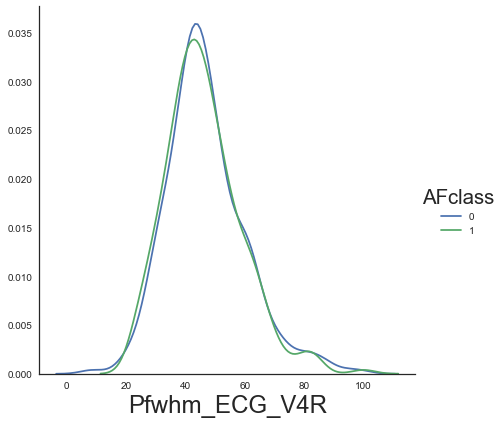

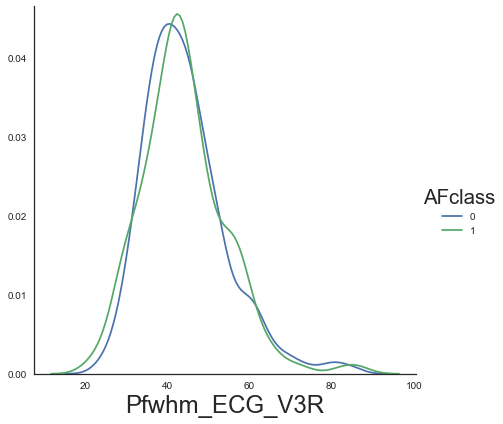

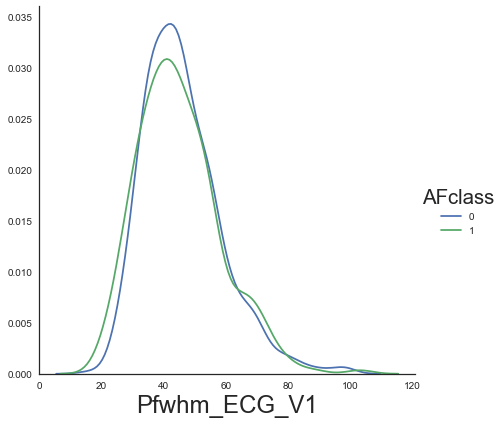

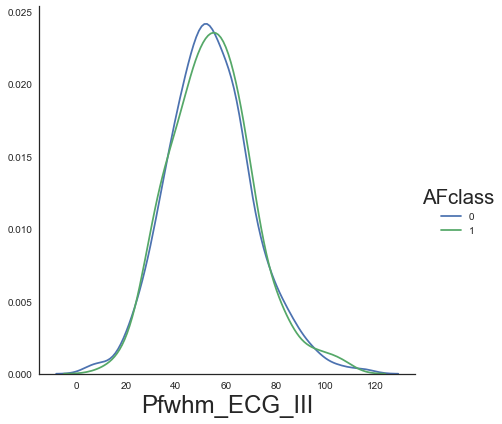

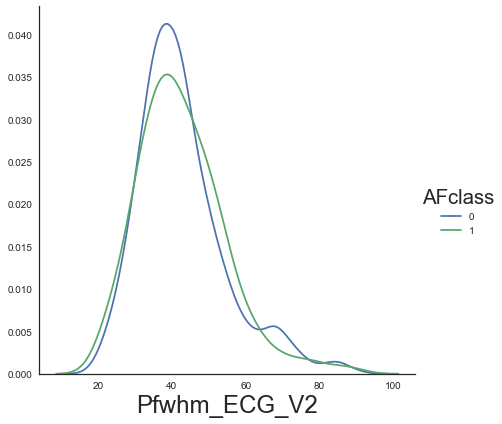

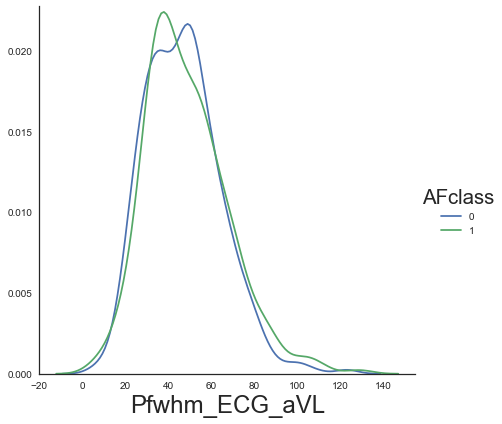

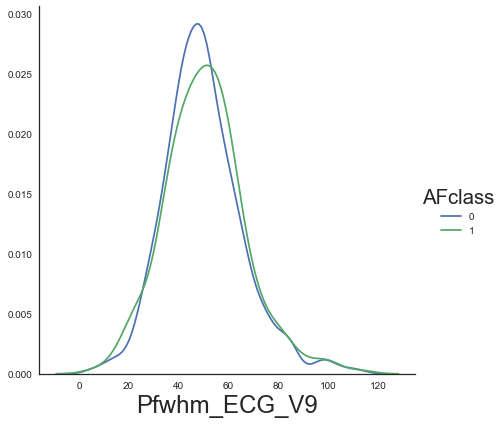

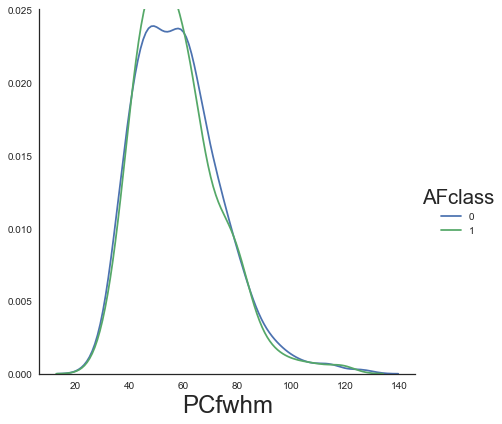

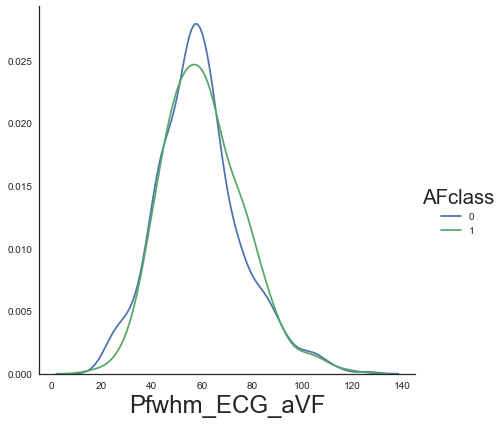

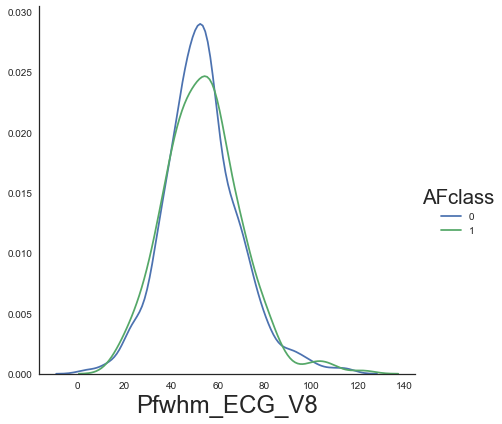

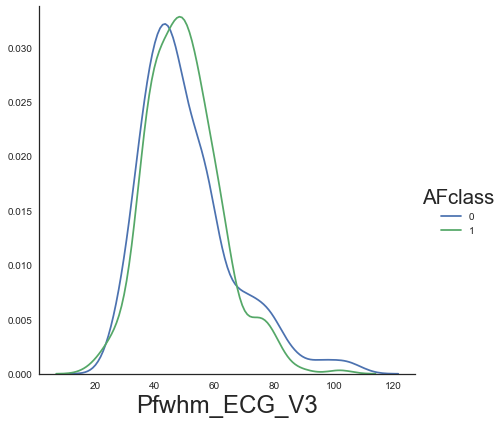

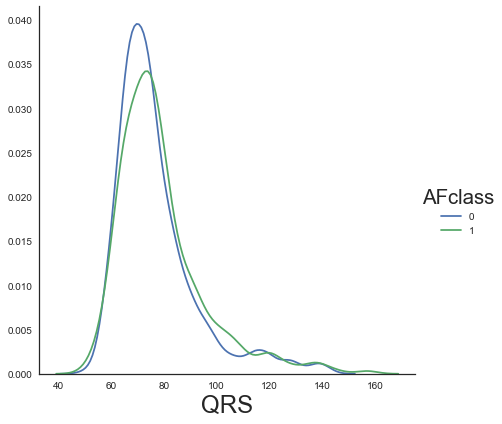

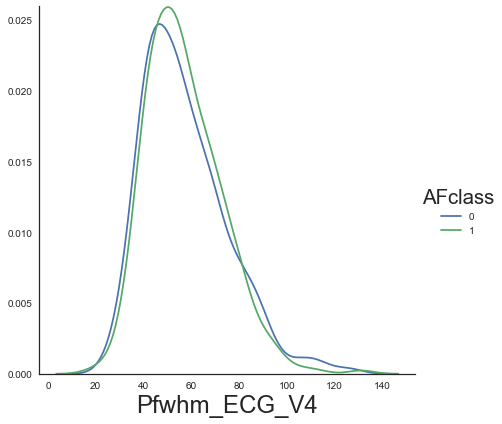

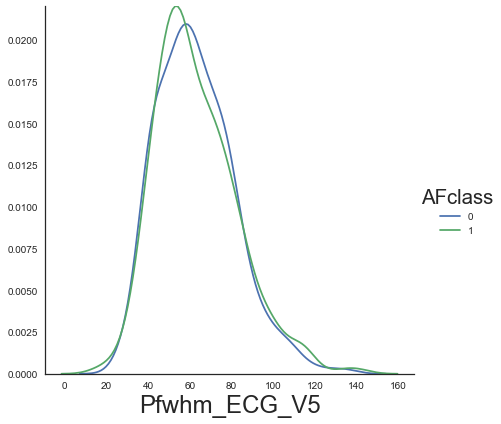

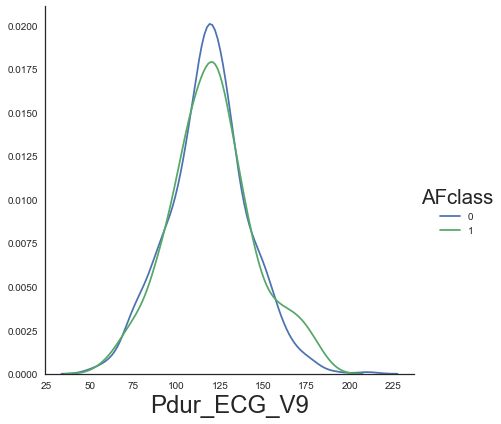

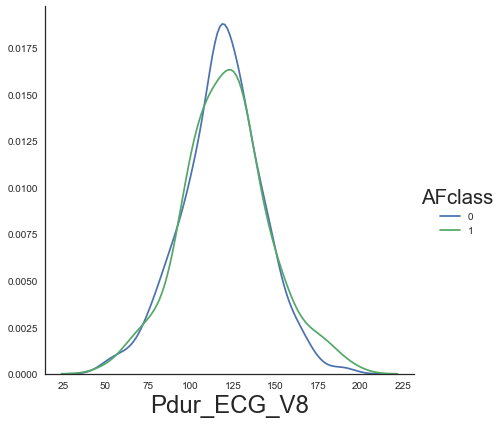

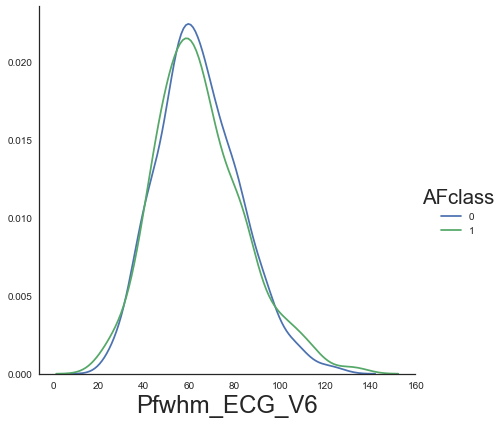

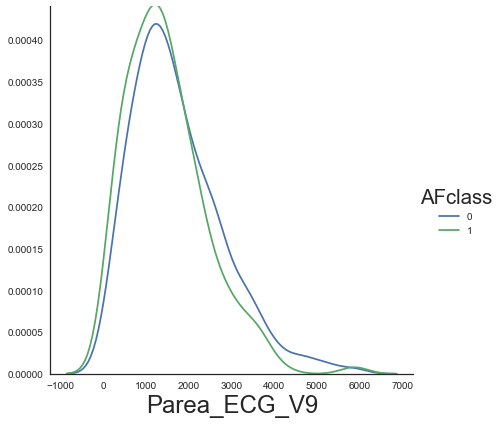

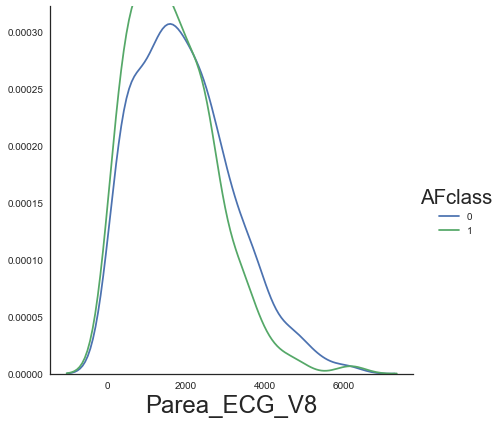

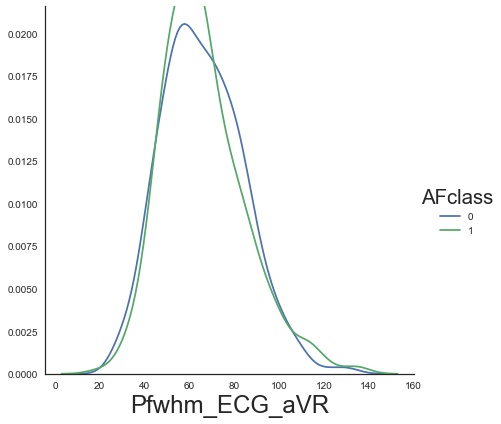

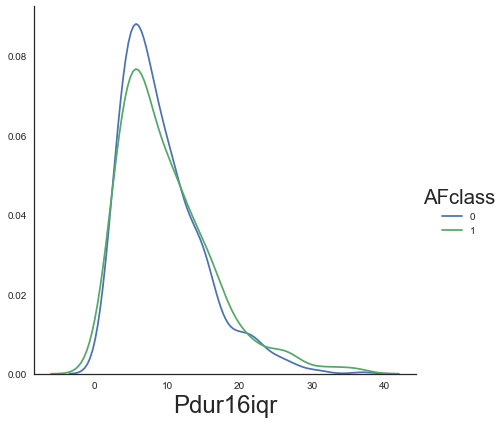

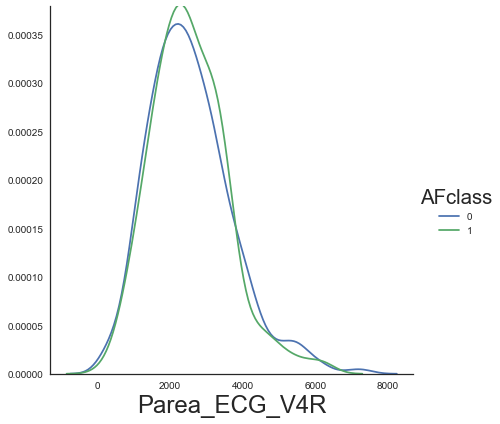

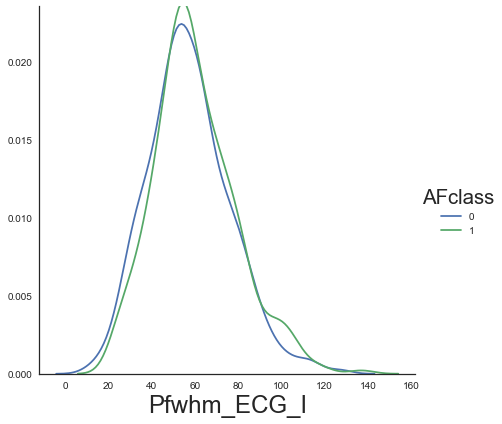

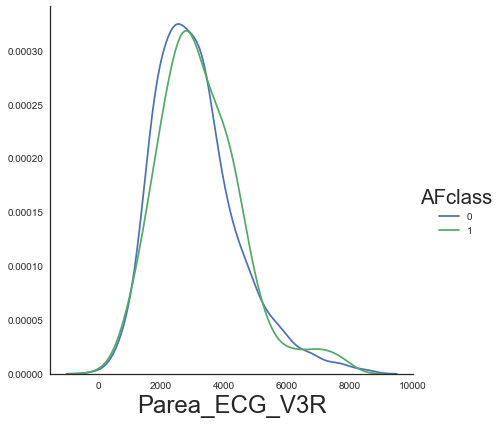

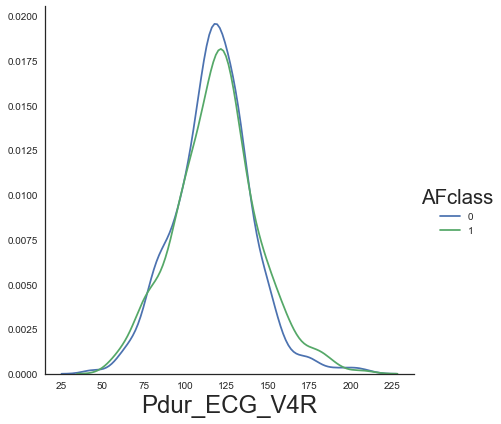

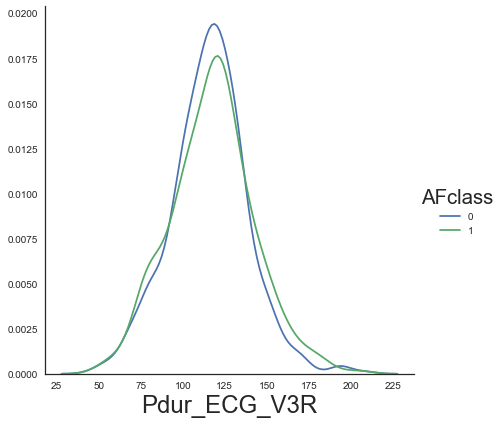

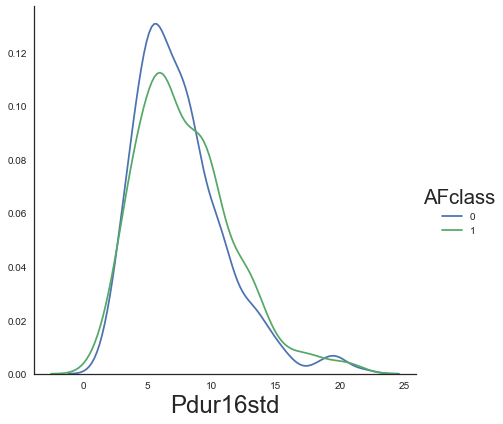

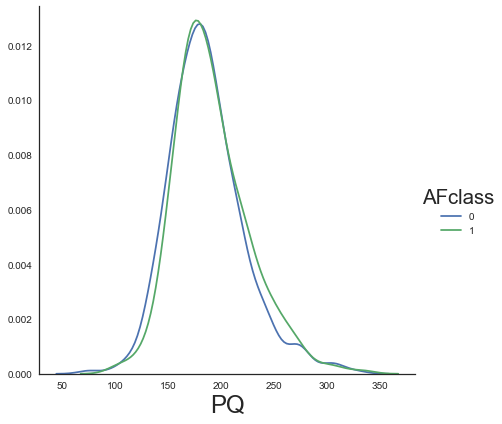

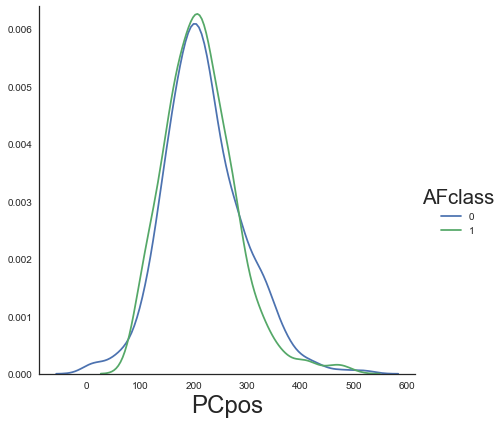

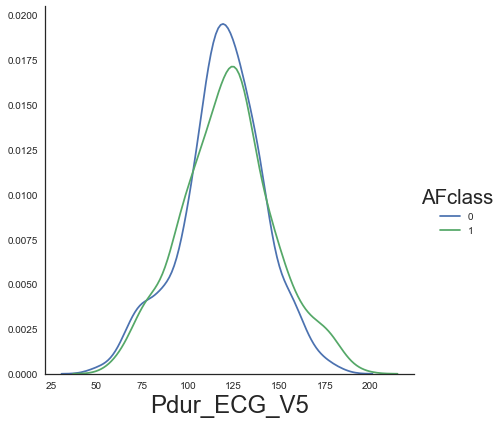

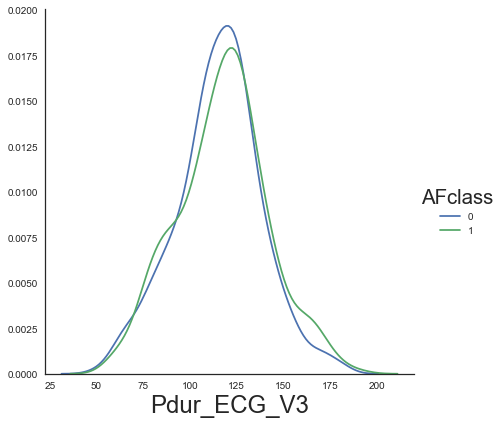

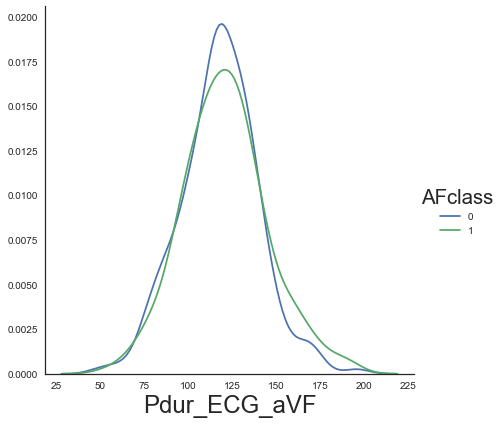

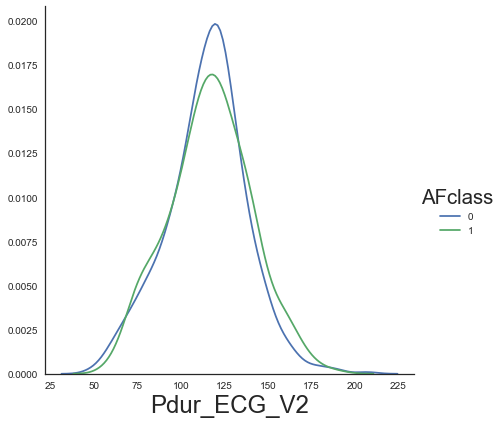

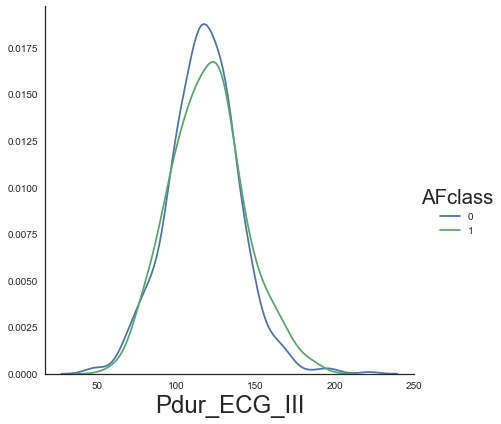

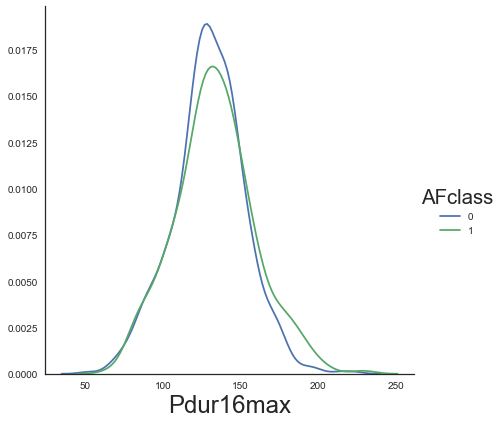

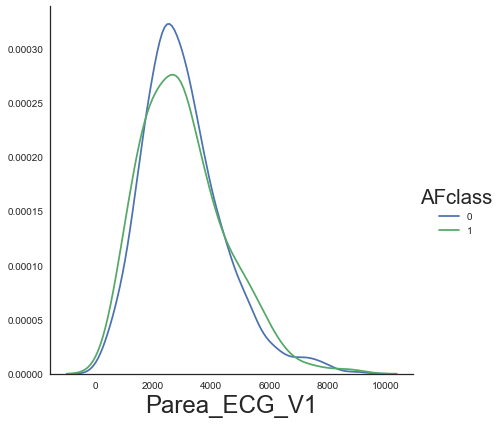

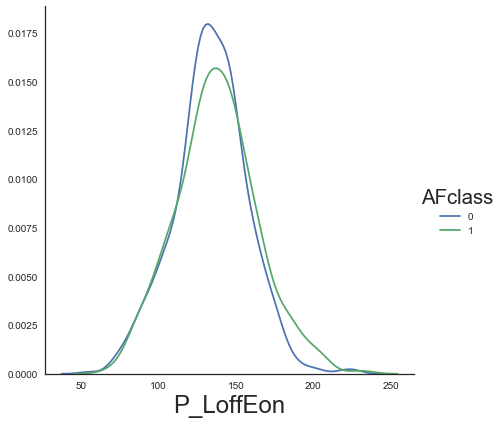

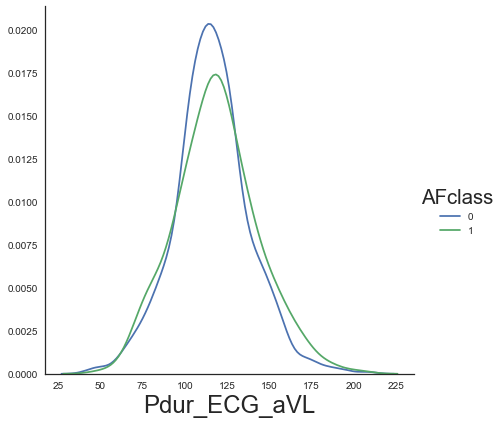

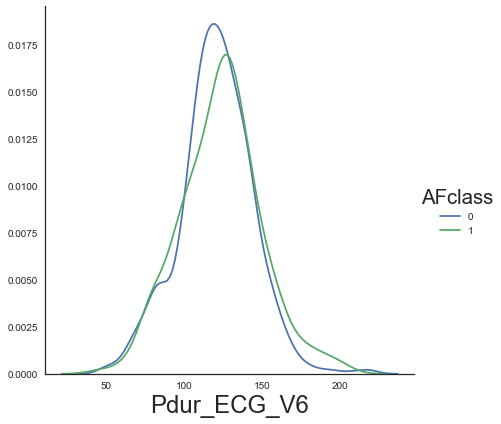

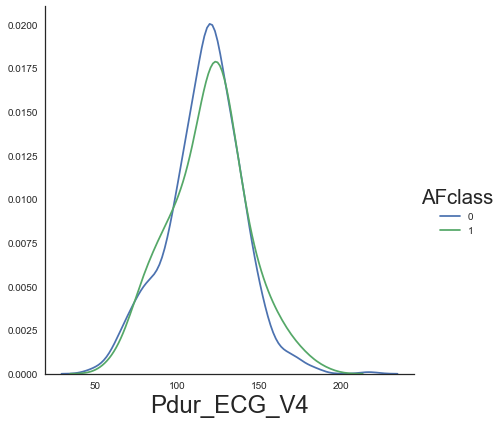

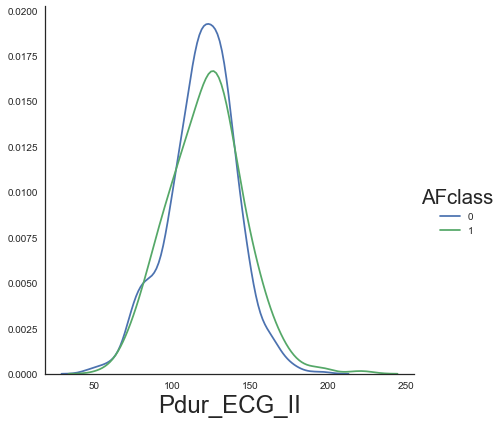

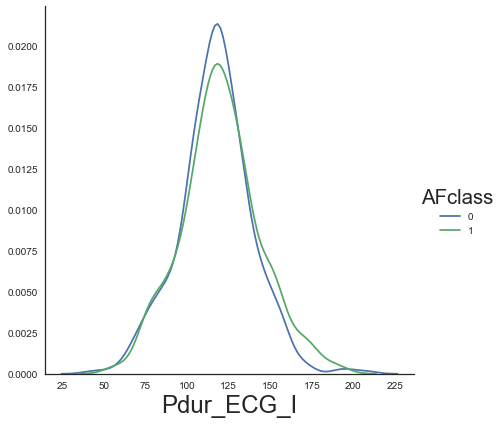

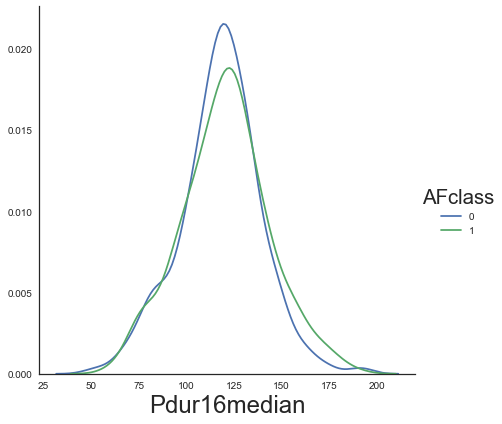

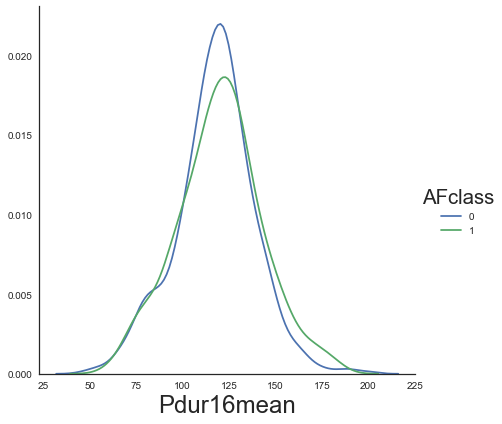

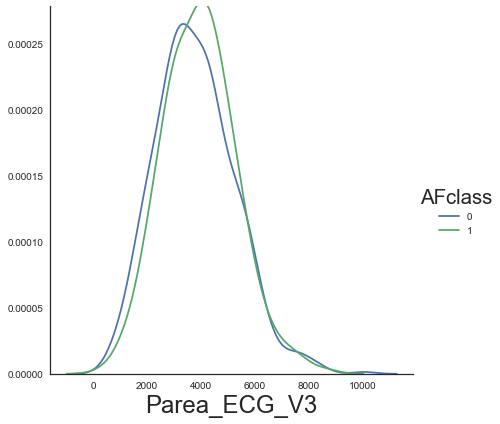

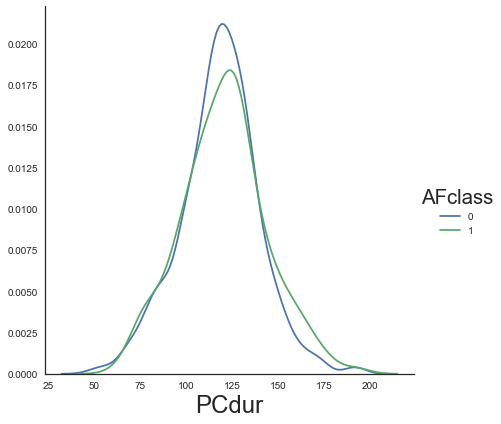

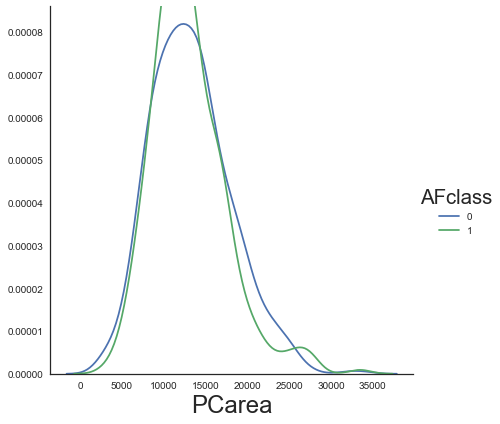

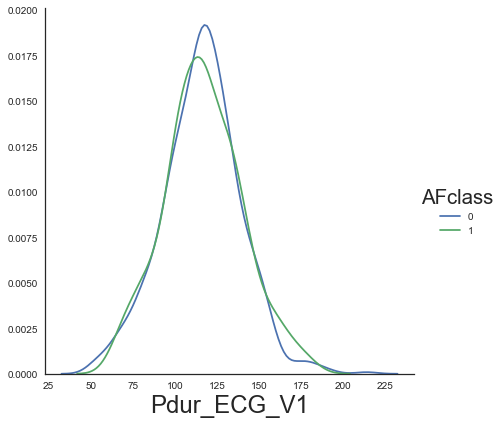

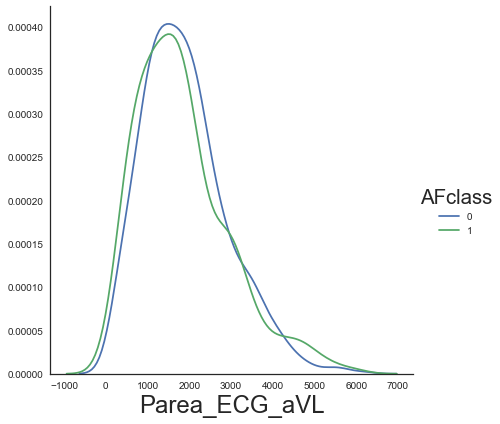

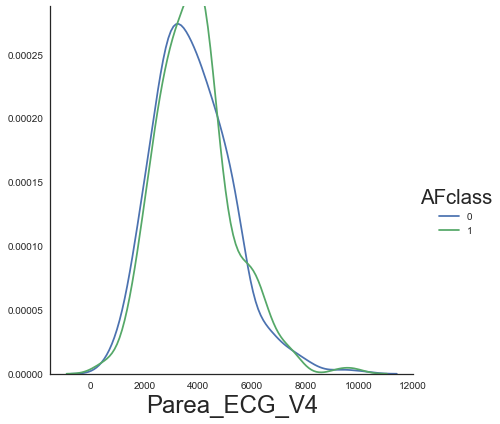

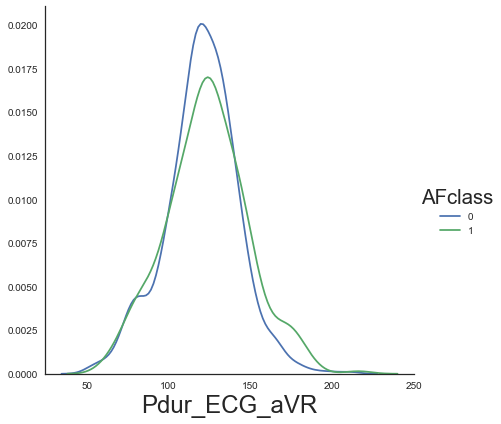

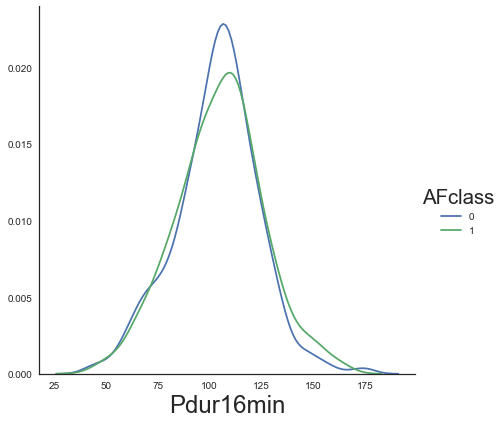

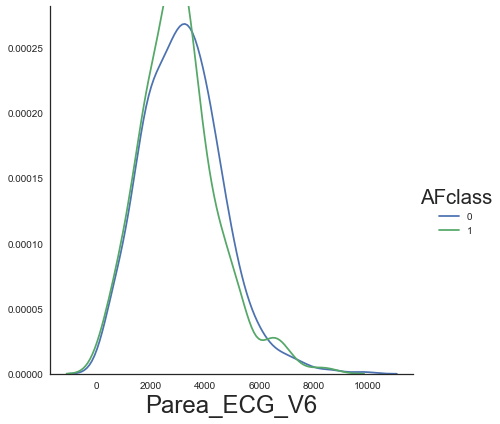

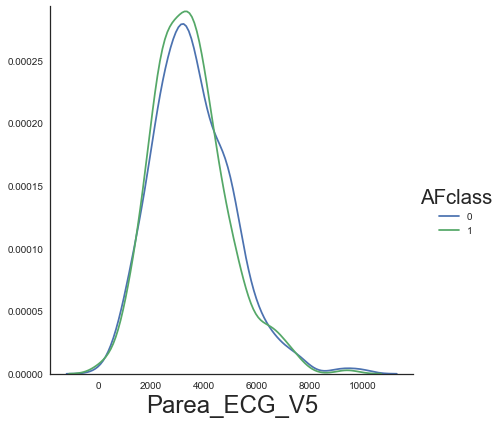

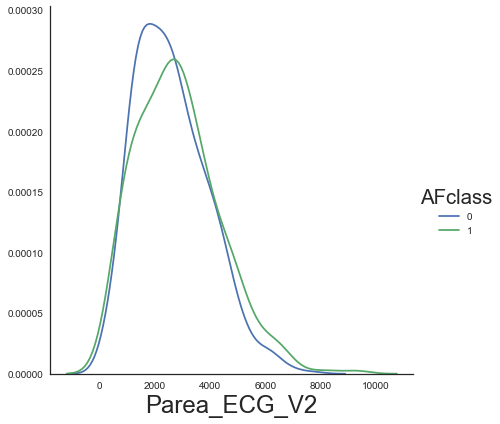

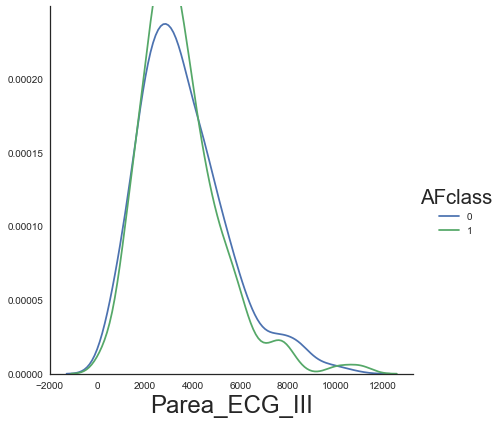

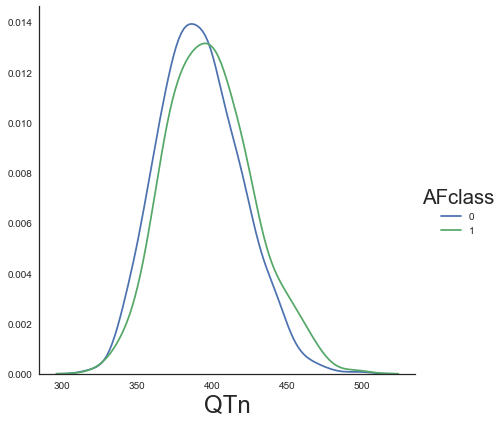

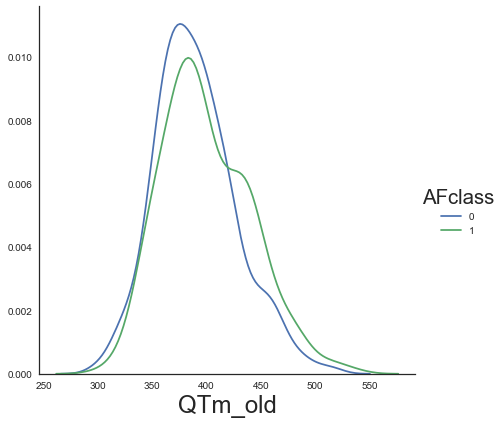

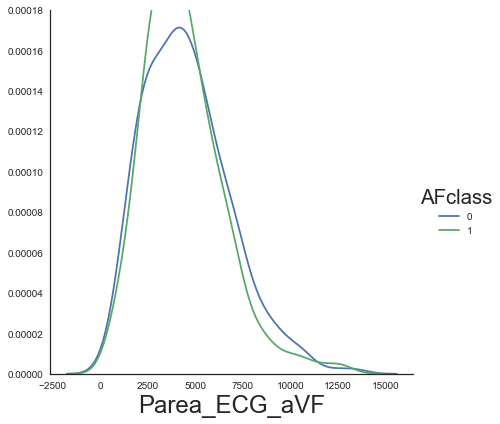

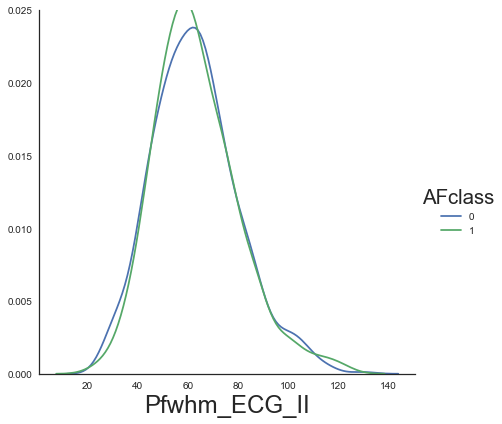

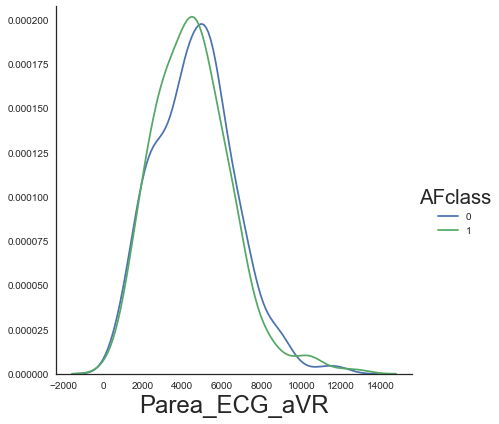

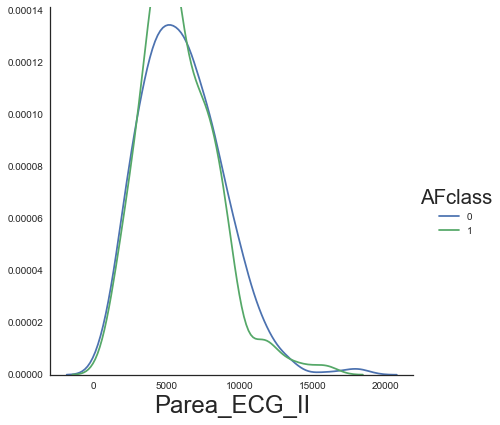

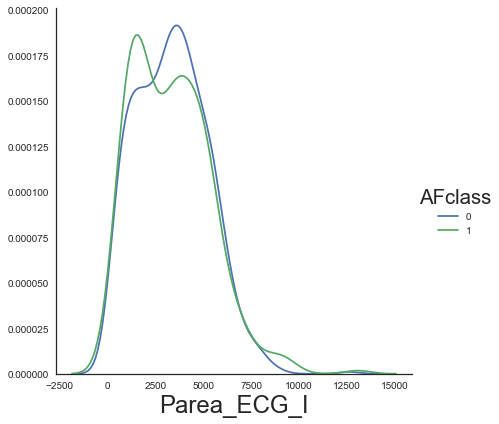

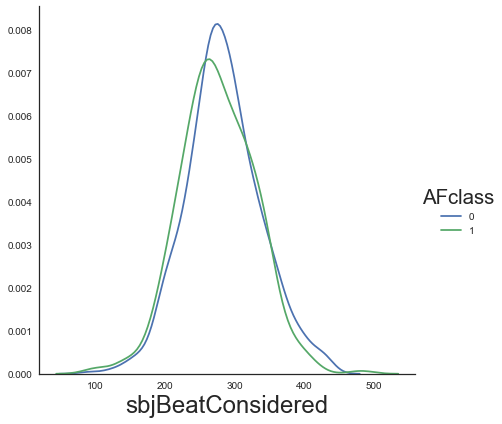

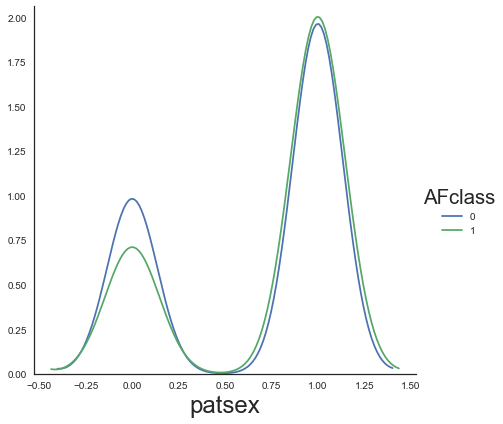

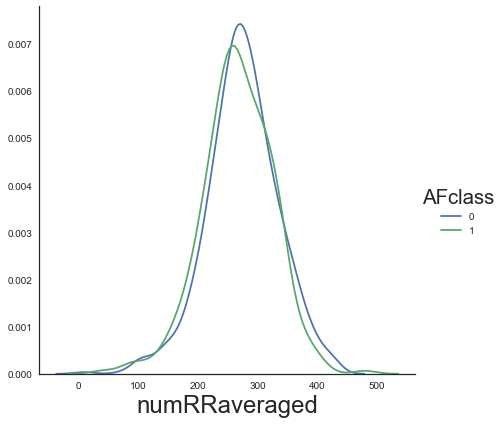

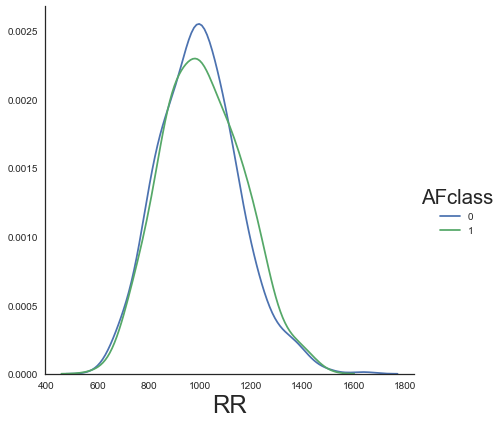

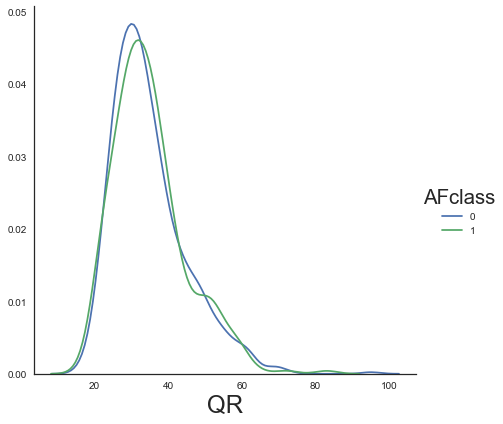

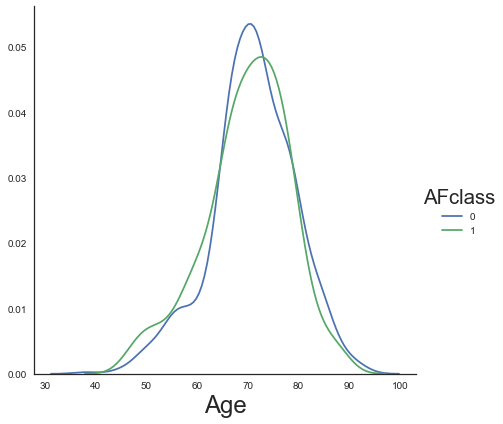

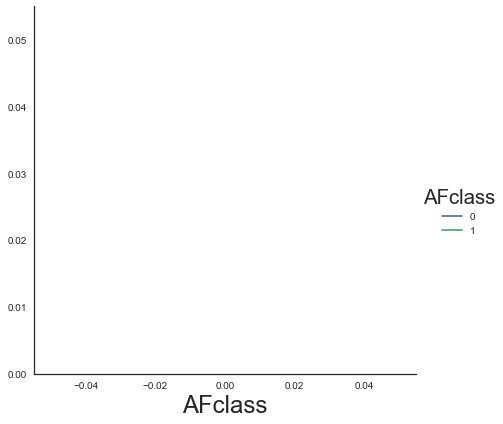

In [17]:
def plotFeature (feature,hue):
    sns.FacetGrid(data, hue= hue, size = 6).map(sns.kdeplot, feature).add_legend()

for (f,v) in missingValueList(data_e):
    plotFeature(v,"AFclass")

### compare missing data value for the two classes

In [18]:
persistentData = data_e[data_e['AFclass'] == 1]
paroxysmalData = data_e[data_e['AFclass'] == 0]

In [19]:
def missingValueComparison(c1, c2):
    featuresList = list(c1) # features from c1, but we assume the two dataset have the same feature list
    c1Size = c1.shape[0]
    c2Size = c2.shape[0]
    numOfMissingPerFeature = {}
    for i in featuresList :
        count1 = c1[i].isnull().sum(axis = 0)
        count2 = c2[i].isnull().sum(axis = 0)
        numOfMissingPerFeature[i] = (count1 , count1/c1Size , count2 , count2/c2Size)
    result = sorted((value,key) for (key,value) in numOfMissingPerFeature.items())
    result.sort(reverse=True)
    return result


In [20]:
missingValueComparison(persistentData,paroxysmalData)

# we can see that the percentage of pissing values (by class) is more or less comparable 
# THERE ARE FEW EXCEPTIONS 

[((76, 0.2289156626506024, 181, 0.25601131541725602), 'Pfwhm_ECG_V4R'),
 ((62, 0.18674698795180722, 162, 0.22913719943422914), 'Pfwhm_ECG_V3R'),
 ((61, 0.18373493975903615, 109, 0.15417256011315417), 'Pfwhm_ECG_III'),
 ((56, 0.16867469879518071, 154, 0.21782178217821782), 'Pfwhm_ECG_V1'),
 ((47, 0.14156626506024098, 75, 0.10608203677510608), 'Pfwhm_ECG_aVL'),
 ((47, 0.14156626506024098, 55, 0.077793493635077787), 'Pfwhm_ECG_V9'),
 ((36, 0.10843373493975904, 39, 0.055162659123055166), 'Pfwhm_ECG_V8'),
 ((34, 0.10240963855421686, 58, 0.082036775106082038), 'PCfwhm'),
 ((31, 0.09337349397590361, 99, 0.14002828854314003), 'Pfwhm_ECG_V2'),
 ((24, 0.072289156626506021, 53, 0.074964639321074958), 'Pfwhm_ECG_aVF'),
 ((22, 0.066265060240963861, 43, 0.060820367751060818), 'Pfwhm_ECG_V3'),
 ((16, 0.048192771084337352, 11, 0.015558698727015558), 'Parea_ECG_V9'),
 ((16, 0.048192771084337352, 10, 0.014144271570014143), 'Parea_ECG_V8'),
 ((14, 0.042168674698795178, 14, 0.019801980198019802), 'Pfwhm_E

##### Impute remaining missing values

In [21]:
entireData = pd.concat([X_incomplete,y], axis = 1)
entireData.shape

(1039, 70)

In [22]:
import fancyimpute 

Using TensorFlow backend.


In [23]:
#X_incomplete_numeric = X_incomplete.as_matrix()
# X_MICE = pd.DataFrame(fancyimpute.MICE(n_imputations=200, impute_type='col', verbose=False).complete(X_incomplete))
X_KNN = pd.DataFrame(fancyimpute.KNN(15).complete(X_incomplete))

Imputing row 1/1039 with 1 missing, elapsed time: 0.674
Imputing row 101/1039 with 3 missing, elapsed time: 0.682
Imputing row 201/1039 with 1 missing, elapsed time: 0.692
Imputing row 301/1039 with 2 missing, elapsed time: 0.698
Imputing row 401/1039 with 2 missing, elapsed time: 0.709
Imputing row 501/1039 with 11 missing, elapsed time: 0.717
Imputing row 601/1039 with 6 missing, elapsed time: 0.723
Imputing row 701/1039 with 0 missing, elapsed time: 0.733
Imputing row 801/1039 with 1 missing, elapsed time: 0.740
Imputing row 901/1039 with 1 missing, elapsed time: 0.748
Imputing row 1001/1039 with 1 missing, elapsed time: 0.754


In [24]:
X_KNN.head()

X_KNN.head()
#X_complete_try.head()
ghj = fancyimpute.KNN(15).complete(X_incomplete)
X_complete_try = pd.DataFrame(ghj, columns = features)


Imputing row 1/1039 with 1 missing, elapsed time: 0.734
Imputing row 101/1039 with 3 missing, elapsed time: 0.743
Imputing row 201/1039 with 1 missing, elapsed time: 0.756
Imputing row 301/1039 with 2 missing, elapsed time: 0.762
Imputing row 401/1039 with 2 missing, elapsed time: 0.774
Imputing row 501/1039 with 11 missing, elapsed time: 0.781
Imputing row 601/1039 with 6 missing, elapsed time: 0.791
Imputing row 701/1039 with 0 missing, elapsed time: 0.798
Imputing row 801/1039 with 1 missing, elapsed time: 0.809
Imputing row 901/1039 with 1 missing, elapsed time: 0.818
Imputing row 1001/1039 with 1 missing, elapsed time: 0.826


In [25]:
X_complete_try.head()

,RR,QTm_old,sbjBeatConsidered,numRRaveraged,QR,QTn,QRS,PQ,PCpos,PCdur,PCfwhm,PCarea,P_LoffEon,Pdur16mean,Pdur16median,Pdur16min,Pdur16max,Pdur16std,Pdur16iqr,Pdur_ECG_I,Pdur_ECG_II,Pdur_ECG_III,Pdur_ECG_V1,Pdur_ECG_V2,Pdur_ECG_V3,Pdur_ECG_V3R,Pdur_ECG_V4,Pdur_ECG_V4R,Pdur_ECG_V5,Pdur_ECG_V6,Pdur_ECG_V8,Pdur_ECG_V9,Pdur_ECG_aVF,Pdur_ECG_aVL,Pdur_ECG_aVR,Parea_ECG_I,Parea_ECG_II,Parea_ECG_III,Parea_ECG_V1,Parea_ECG_V2,Parea_ECG_V3,Parea_ECG_V3R,Parea_ECG_V4,Parea_ECG_V4R,Parea_ECG_V5,Parea_ECG_V6,Parea_ECG_V8,Parea_ECG_V9,Parea_ECG_aVF,Parea_ECG_aVL,Parea_ECG_aVR,Pfwhm_ECG_I,Pfwhm_ECG_II,Pfwhm_ECG_III,Pfwhm_ECG_V1,Pfwhm_ECG_V2,Pfwhm_ECG_V3,Pfwhm_ECG_V3R,Pfwhm_ECG_V4,Pfwhm_ECG_V4R,Pfwhm_ECG_V5,Pfwhm_ECG_V6,Pfwhm_ECG_V8,Pfwhm_ECG_V9,Pfwhm_ECG_aVF,Pfwhm_ECG_aVL,Pfwhm_ECG_aVR,patsex,Age
0,958.864341,415.0,272.0,258.0,41.0,423.808354,83.130502,166.0,208.21120,122.0,52.10900,12260.060,128.0,116.7500,122.0,103.0,127.0,8.590693,15.0,127.0,122.0,123.0,103.0,104.0,106.0,124.0,115.0,125.0,122.0,122.0,109.0,108.0,123.0,125.0,110.0,263.0136,5362.682,5708.737,2273.143,1696.737,2135.829,4283.591,1851.163,4407.373,1380.435,1004.7170,277.7214,150.4419,5524.828,2854.6800,2195.197,30.49997,57.02770,58.01223,34.05282,47.002300,49.00052,44.186120,54.00165,46.017160,63.00000,82.00008,55.139010,14.535690,58.03868,58.000240,53.00407,1.0,69.0
1,1226.748954,436.0,241.0,239.0,29.0,393.648536,73.000000,173.0,260.65770,123.0,44.01226,13517.650,131.0,122.5000,122.5,118.0,129.0,3.326660,4.0,120.0,123.0,122.0,129.0,125.0,123.0,128.0,119.0,118.0,121.0,119.0,123.0,127.0,120.0,123.0,120.0,4532.1150,5892.711,1651.906,3547.616,4571.468,4837.418,2817.351,4680.697,2087.393,4258.456,3482.6350,1930.2140,995.2422,3497.340,1460.6280,5155.017,66.00002,56.00309,62.00139,35.01057,38.085190,39.00154,41.403247,41.14600,57.000350,44.00013,62.00000,60.000010,47.547011,55.00077,65.003600,63.00058,1.0,65.0
2,944.513423,409.0,304.0,298.0,50.0,420.842160,81.000000,190.0,96.17484,87.0,34.00043,3159.255,102.0,83.8125,83.5,76.0,99.0,5.833452,8.5,81.0,84.0,85.0,88.0,89.0,87.0,83.0,84.0,99.0,79.0,76.0,78.0,89.0,83.0,77.0,79.0,1174.2350,1239.271,1051.392,1333.991,3042.095,3178.096,1409.781,2454.455,1715.193,1523.813,701.4687,244.7173,507.6052,1000.888,716.9587,1140.381,40.00084,29.00667,27.00890,34.03117,37.025390,38.00840,33.013050,38.00700,39.002295,37.00476,36.00004,40.000480,42.000150,29.01569,27.012700,35.01698,1.0,70.0
3,1044.842105,368.0,273.0,266.0,41.0,360.016567,67.000000,204.0,283.01460,135.0,54.00034,17693.560,148.0,133.4375,135.5,119.0,143.0,6.632936,10.0,135.0,135.0,136.0,126.0,125.0,138.0,119.0,126.0,137.0,133.0,142.0,129.0,143.0,137.0,136.0,138.0,4212.6670,8970.183,4467.621,2235.111,1111.535,3872.242,1350.757,4290.114,1446.737,4431.777,4567.2600,3698.0870,3930.4230,6741.289,368.5719,6676.249,48.00072,54.00824,58.00010,33.04055,34.596953,55.00000,35.014140,54.00042,59.000040,54.00589,56.00492,55.024120,56.000440,56.00172,26.000830,52.00974,1.0,73.0
4,761.765464,388.0,389.0,388.0,38.0,444.550483,83.000000,200.0,194.99520,137.0,43.14584,9944.122,176.0,145.8750,141.0,126.0,165.0,12.483990,22.5,137.0,160.0,148.0,136.0,137.0,137.0,135.0,145.0,135.0,165.0,126.0,155.0,137.0,158.0,160.0,163.0,414.9699,5722.688,5873.872,5250.664,3234.833,2383.849,4206.080,2187.993,2971.253,1188.533,268.2469,2388.2710,1724.1500,5677.880,3482.7070,2835.552,24.38789,103.00880,76.00874,43.03947,58.025740,53.01237,44.017960,45.00424,42.002620,83.00031,26.00000,46.961209,45.005610,77.00192,49.902896,111.00070,0.0,67.0


In [24]:
## problem with the indices -> need to modify the import function of the dataset so that the indeces contunue to grow -> right now when we add the 2 datasets par and per the indaces restart from zero!!!

In [25]:
y_numeric = y.as_matrix()

y_numeric

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
y_new = pd.DataFrame(y_numeric)
y_new = y_new.rename(columns = {y_new.columns[0] : 'AFclass'})
Data_KNN = pd.concat([X_KNN,y_new], axis = 1)


# change age with Afclass
all_feature_ordered_for_knn_dataset = all_features


qwe = all_feature_ordered_for_knn_dataset.delete(69)
all_feature_ordered_for_knn_dataset = qwe.insert(68,"Age")


In [27]:
Data_KNN_2 = Data_KNN.rename(columns = {0:'RR', 1:'QTm_old',2: 'sbjBeatConsidered', 3:'numRRaveraged', 4:'QR', 5:'QTn',
       6:'QRS', 7:'PQ', 8:'PCpos', 9:'PCdur', 10:'PCfwhm', 11:'PCarea', 12:'P_LoffEon',
       13:'Pdur16mean', 14:'Pdur16median', 15:'Pdur16min', 16:'Pdur16max', 17:'Pdur16std',
       18:'Pdur16iqr',19: 'Pdur_ECG_I', 20:'Pdur_ECG_II', 21:'Pdur_ECG_III',22: 'Pdur_ECG_V1',
       23:'Pdur_ECG_V2',24: 'Pdur_ECG_V3', 25:'Pdur_ECG_V3R',26: 'Pdur_ECG_V4',
       27:'Pdur_ECG_V4R',28: 'Pdur_ECG_V5', 29:'Pdur_ECG_V6', 30:'Pdur_ECG_V8',
      31: 'Pdur_ECG_V9', 32:'Pdur_ECG_aVF', 33:'Pdur_ECG_aVL', 34:'Pdur_ECG_aVR',
      35: 'Parea_ECG_I', 36:'Parea_ECG_II', 37:'Parea_ECG_III',38: 'Parea_ECG_V1',
       39:'Parea_ECG_V2', 40:'Parea_ECG_V3', 41:'Parea_ECG_V3R',42: 'Parea_ECG_V4',
      43: 'Parea_ECG_V4R', 44:'Parea_ECG_V5',45: 'Parea_ECG_V6', 46:'Parea_ECG_V8',
      47: 'Parea_ECG_V9', 48:'Parea_ECG_aVF', 49:'Parea_ECG_aVL',50: 'Parea_ECG_aVR',
      51: 'Pfwhm_ECG_I', 52:'Pfwhm_ECG_II', 53:'Pfwhm_ECG_III',54: 'Pfwhm_ECG_V1',
       55:'Pfwhm_ECG_V2', 56:'Pfwhm_ECG_V3', 57:'Pfwhm_ECG_V3R',58: 'Pfwhm_ECG_V4',
     59:  'Pfwhm_ECG_V4R',60: 'Pfwhm_ECG_V5', 61:'Pfwhm_ECG_V6',62: 'Pfwhm_ECG_V8',
      63: 'Pfwhm_ECG_V9', 64:'Pfwhm_ECG_aVF',65: 'Pfwhm_ECG_aVL',66: 'Pfwhm_ECG_aVR',
       67:'patsex',68: 'Age',69: 'AFclass'},inplace=False)



In [28]:
Data_KNN_2.head()

,RR,QTm_old,sbjBeatConsidered,numRRaveraged,QR,QTn,QRS,PQ,PCpos,PCdur,PCfwhm,PCarea,P_LoffEon,Pdur16mean,Pdur16median,Pdur16min,Pdur16max,Pdur16std,Pdur16iqr,Pdur_ECG_I,Pdur_ECG_II,Pdur_ECG_III,Pdur_ECG_V1,Pdur_ECG_V2,Pdur_ECG_V3,Pdur_ECG_V3R,Pdur_ECG_V4,Pdur_ECG_V4R,Pdur_ECG_V5,Pdur_ECG_V6,Pdur_ECG_V8,Pdur_ECG_V9,Pdur_ECG_aVF,Pdur_ECG_aVL,Pdur_ECG_aVR,Parea_ECG_I,Parea_ECG_II,Parea_ECG_III,Parea_ECG_V1,Parea_ECG_V2,Parea_ECG_V3,Parea_ECG_V3R,Parea_ECG_V4,Parea_ECG_V4R,Parea_ECG_V5,Parea_ECG_V6,Parea_ECG_V8,Parea_ECG_V9,Parea_ECG_aVF,Parea_ECG_aVL,Parea_ECG_aVR,Pfwhm_ECG_I,Pfwhm_ECG_II,Pfwhm_ECG_III,Pfwhm_ECG_V1,Pfwhm_ECG_V2,Pfwhm_ECG_V3,Pfwhm_ECG_V3R,Pfwhm_ECG_V4,Pfwhm_ECG_V4R,Pfwhm_ECG_V5,Pfwhm_ECG_V6,Pfwhm_ECG_V8,Pfwhm_ECG_V9,Pfwhm_ECG_aVF,Pfwhm_ECG_aVL,Pfwhm_ECG_aVR,patsex,Age,AFclass
0,958.864341,415.0,272.0,258.0,41.0,423.808354,83.130502,166.0,208.21120,122.0,52.10900,12260.060,128.0,116.7500,122.0,103.0,127.0,8.590693,15.0,127.0,122.0,123.0,103.0,104.0,106.0,124.0,115.0,125.0,122.0,122.0,109.0,108.0,123.0,125.0,110.0,263.0136,5362.682,5708.737,2273.143,1696.737,2135.829,4283.591,1851.163,4407.373,1380.435,1004.7170,277.7214,150.4419,5524.828,2854.6800,2195.197,30.49997,57.02770,58.01223,34.05282,47.002300,49.00052,44.186120,54.00165,46.017160,63.00000,82.00008,55.139010,14.535690,58.03868,58.000240,53.00407,1.0,69.0,1
1,1226.748954,436.0,241.0,239.0,29.0,393.648536,73.000000,173.0,260.65770,123.0,44.01226,13517.650,131.0,122.5000,122.5,118.0,129.0,3.326660,4.0,120.0,123.0,122.0,129.0,125.0,123.0,128.0,119.0,118.0,121.0,119.0,123.0,127.0,120.0,123.0,120.0,4532.1150,5892.711,1651.906,3547.616,4571.468,4837.418,2817.351,4680.697,2087.393,4258.456,3482.6350,1930.2140,995.2422,3497.340,1460.6280,5155.017,66.00002,56.00309,62.00139,35.01057,38.085190,39.00154,41.403247,41.14600,57.000350,44.00013,62.00000,60.000010,47.547011,55.00077,65.003600,63.00058,1.0,65.0,1
2,944.513423,409.0,304.0,298.0,50.0,420.842160,81.000000,190.0,96.17484,87.0,34.00043,3159.255,102.0,83.8125,83.5,76.0,99.0,5.833452,8.5,81.0,84.0,85.0,88.0,89.0,87.0,83.0,84.0,99.0,79.0,76.0,78.0,89.0,83.0,77.0,79.0,1174.2350,1239.271,1051.392,1333.991,3042.095,3178.096,1409.781,2454.455,1715.193,1523.813,701.4687,244.7173,507.6052,1000.888,716.9587,1140.381,40.00084,29.00667,27.00890,34.03117,37.025390,38.00840,33.013050,38.00700,39.002295,37.00476,36.00004,40.000480,42.000150,29.01569,27.012700,35.01698,1.0,70.0,1
3,1044.842105,368.0,273.0,266.0,41.0,360.016567,67.000000,204.0,283.01460,135.0,54.00034,17693.560,148.0,133.4375,135.5,119.0,143.0,6.632936,10.0,135.0,135.0,136.0,126.0,125.0,138.0,119.0,126.0,137.0,133.0,142.0,129.0,143.0,137.0,136.0,138.0,4212.6670,8970.183,4467.621,2235.111,1111.535,3872.242,1350.757,4290.114,1446.737,4431.777,4567.2600,3698.0870,3930.4230,6741.289,368.5719,6676.249,48.00072,54.00824,58.00010,33.04055,34.596953,55.00000,35.014140,54.00042,59.000040,54.00589,56.00492,55.024120,56.000440,56.00172,26.000830,52.00974,1.0,73.0,1
4,761.765464,388.0,389.0,388.0,38.0,444.550483,83.000000,200.0,194.99520,137.0,43.14584,9944.122,176.0,145.8750,141.0,126.0,165.0,12.483990,22.5,137.0,160.0,148.0,136.0,137.0,137.0,135.0,145.0,135.0,165.0,126.0,155.0,137.0,158.0,160.0,163.0,414.9699,5722.688,5873.872,5250.664,3234.833,2383.849,4206.080,2187.993,2971.253,1188.533,268.2469,2388.2710,1724.1500,5677.880,3482.7070,2835.552,24.38789,103.00880,76.00874,43.03947,58.025740,53.01237,44.017960,45.00424,42.002620,83.00031,26.00000,46.961209,45.005610,77.00192,49.902896,111.00070,0.0,67.0,1


### Prepare X set and Y set

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X_set = Data_KNN_2[features]
# y # just the target -> AFclass

In [31]:
# TRY with normalized data
X_set[features] = StandardScaler().fit_transform(X_set[features])

In [32]:
X_set.head()

,RR,QTm_old,sbjBeatConsidered,numRRaveraged,QR,QTn,QRS,PQ,PCpos,PCdur,PCfwhm,PCarea,P_LoffEon,Pdur16mean,Pdur16median,Pdur16min,Pdur16max,Pdur16std,Pdur16iqr,Pdur_ECG_I,Pdur_ECG_II,Pdur_ECG_III,Pdur_ECG_V1,Pdur_ECG_V2,Pdur_ECG_V3,Pdur_ECG_V3R,Pdur_ECG_V4,Pdur_ECG_V4R,Pdur_ECG_V5,Pdur_ECG_V6,Pdur_ECG_V8,Pdur_ECG_V9,Pdur_ECG_aVF,Pdur_ECG_aVL,Pdur_ECG_aVR,Parea_ECG_I,Parea_ECG_II,Parea_ECG_III,Parea_ECG_V1,Parea_ECG_V2,Parea_ECG_V3,Parea_ECG_V3R,Parea_ECG_V4,Parea_ECG_V4R,Parea_ECG_V5,Parea_ECG_V6,Parea_ECG_V8,Parea_ECG_V9,Parea_ECG_aVF,Parea_ECG_aVL,Parea_ECG_aVR,Pfwhm_ECG_I,Pfwhm_ECG_II,Pfwhm_ECG_III,Pfwhm_ECG_V1,Pfwhm_ECG_V2,Pfwhm_ECG_V3,Pfwhm_ECG_V3R,Pfwhm_ECG_V4,Pfwhm_ECG_V4R,Pfwhm_ECG_V5,Pfwhm_ECG_V6,Pfwhm_ECG_V8,Pfwhm_ECG_V9,Pfwhm_ECG_aVF,Pfwhm_ECG_aVL,Pfwhm_ECG_aVR,patsex,Age
0,-0.271404,0.562704,-0.174283,-0.250688,0.618608,1.063170,0.363171,-0.619812,-0.123952,0.132141,-0.350031,-0.201123,-0.280015,-0.072220,0.146730,-0.046332,-0.169211,0.265445,0.953855,0.388887,0.092426,0.225022,-0.573116,-0.501606,-0.432654,0.320699,-0.113743,0.306904,0.089746,0.014479,-0.427583,-0.472891,0.174787,0.342180,-0.482679,-1.610142,-0.235489,1.192386,-0.540766,-0.704108,-1.192552,0.866401,-1.362148,1.691503,-1.468441,-1.484009,-1.336475,-1.455956,0.458147,0.925879,-1.195683,-1.472960,-0.359856,0.294973,-0.982377,0.382186,-0.099249,-0.001307,-0.190863,-0.043275,0.009976,0.953400,0.119923,-2.348532,-0.069304,0.624116,-0.713216,0.670144,-0.194383
1,1.441637,1.104835,-0.749964,-0.573445,-0.583700,-0.023908,-0.286965,-0.421656,0.597455,0.177365,-0.882152,0.063911,-0.158585,0.190770,0.169472,0.681077,-0.086194,-1.205529,-0.943776,0.079954,0.136552,0.181048,0.549388,0.405072,0.296686,0.490054,0.058250,0.012457,0.047287,-0.107686,0.155382,0.345952,0.043486,0.255609,-0.053468,0.617066,-0.042425,-1.050326,0.367641,1.372461,0.680702,-0.248792,0.583165,-0.409143,0.474105,0.225211,0.051393,-0.636785,-0.452045,-0.404568,0.274181,0.408591,-0.420500,0.547195,-0.900334,-0.410880,-0.812430,-0.304433,-0.948974,0.904737,-1.003487,-0.132566,0.427781,-0.164115,-0.257241,1.029667,-0.158201,0.670144,-0.678128
2,-0.363174,0.407809,0.419969,0.428800,1.520339,0.956256,0.226444,0.059580,-1.665023,-1.450691,-1.540135,-2.119093,-1.332410,-1.578698,-1.604396,-1.355670,-1.331438,-0.505035,-0.167472,-1.641249,-1.584379,-1.445971,-1.220714,-1.149233,-1.247798,-1.415192,-1.446691,-0.786754,-1.736027,-1.858729,-1.718434,-1.291735,-1.575888,-1.735535,-1.813233,-1.134754,-1.737450,-1.382305,-1.210165,0.267715,-0.469855,-1.319362,-0.947382,-0.746155,-1.371667,-1.693184,-1.364194,-1.109628,-1.572767,-1.114306,-1.719511,-0.969401,-2.018371,-1.665262,-0.984232,-0.505136,-0.883266,-1.218340,-1.134084,-0.648761,-1.376624,-1.544315,-0.838835,-0.531161,-1.864785,-1.170315,-1.711875,0.670144,-0.073446
3,0.278398,-0.650638,-0.155712,-0.114790,0.618608,-1.236136,-0.672021,0.455893,0.904976,0.720050,-0.225731,0.943973,0.529520,0.691023,0.760761,0.729571,0.494919,-0.281628,0.091295,0.741955,0.666069,0.796677,0.419868,0.405072,0.940222,0.109005,0.359238,0.811669,0.556805,0.828918,0.405224,1.035504,0.787523,0.818323,0.719112,0.450408,1.078550,0.506268,-0.567874,-1.126830,0.011459,-1.364254,0.314638,-0.989231,0.591090,0.973365,1.536164,2.209349,1.004248,-1.446797,1.029634,-0.545397,-0.538572,0.294207,-1.069091,-0.721115,0.328667,-1.000370,-0.190935,1.077340,-0.469775,-0.458088,0.112647,0.395263,-0.195318,-1.228911,-0.768422,0.670144,0.289363
4,-1.531792,-0.134323,1.998452,1.957648,0.318031,1.810797,0.354796,0.342660,-0.305739,0.810497,-0.939094,-0.689201,1.662869,1.259883,1.010922,1.069029,1.408098,1.353382,2.247694,0.830221,1.769231,1.324359,0.851600,0.923174,0.897319,0.786426,1.176206,0.727541,1.915520,0.177367,1.487874,0.776922,1.706627,1.857181,1.792139,-1.530866,-0.104357,1.283677,1.581523,0.406940,-1.020578,0.807448,-1.130576,0.391156,-1.597967,-1.992012,0.436098,0.070009,0.526856,1.525252,-0.877679,-1.796909,2.361685,1.432832,-0.212560,1.362583,0.186898,-0.019624,-0.721449,-0.389789,1.

# Testing -> all the data

In [33]:
random_state = np.random.RandomState(1234)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_set, y)
model.score(X_set, y)

0.71318575553416752

### SVM -> normalized

In [35]:
from sklearn import svm
model = svm.SVC(kernel='rbf',C=1, probability=True,
                     random_state=random_state)
model = model.fit(X_set, y)
model.score(X_set, y)

0.72666025024061598

### cross validation -> on NOT normalized data! AND UNBALANCED data set

In [36]:
X_Not_Norm = Data_KNN_2[features]

##### Simple Logistic regression

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

simple_logistic = LogisticRegression(C=10e10, random_state=1234)
simple_eval = model_selection.cross_val_score(simple_logistic, X_Not_Norm, y, cv=StratifiedKFold(n_splits=10,random_state=1234,shuffle=True))
print("Simple Logistic Regression\t%.1f%%\t%.1f%%" % (100.0*np.average(simple_eval), 100.0*np.std(simple_eval)))

Simple Logistic Regression	66.6%	3.3%


##### Naive Bayes

In [38]:
from sklearn import naive_bayes

nb = naive_bayes.GaussianNB();
nb_eval = model_selection.cross_val_score(nb, X_Not_Norm, y, cv=StratifiedKFold(n_splits=10,random_state=871263,shuffle=True))
print("Naive Bayes\t%.1f%%\t%.1f%%" % (100.0*np.average(nb_eval), 100.0*np.std(nb_eval)))

Naive Bayes	58.4%	5.1%


##### KNN

In [39]:
from sklearn import neighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
knn = neighbors.KNeighborsClassifier(20, weights='distance')
knn_eval = model_selection.cross_val_score(knn, X_Not_Norm, y, cv=StratifiedKFold(n_splits=10,random_state=19872,shuffle=True))
print("k Nearest Neighbor\t%.1f%%\t%.1f%%" % (100.0*np.average(knn_eval), 100.0*np.std(knn_eval)))

k Nearest Neighbor	67.0%	1.9%


##### Random Forest

In [40]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40, max_depth=None, min_samples_split=2, random_state=0)
rf_eval = model_selection.cross_val_score(rf, X_Not_Norm, y, cv=StratifiedKFold(n_splits=10,random_state=900234,shuffle=True))

print("Random Forest\t%.1f%%\t%.1f%%" % (100.0*np.average(rf_eval), 100.0*np.std(rf_eval)))

Random Forest	66.7%	3.0%


# 1st TEST WITH BALANCED DATASET (pers size -> 332 x 2)
### Not very promising results
### Maybe too few data


In [41]:
Data_KNN_2.head()

,RR,QTm_old,sbjBeatConsidered,numRRaveraged,QR,QTn,QRS,PQ,PCpos,PCdur,PCfwhm,PCarea,P_LoffEon,Pdur16mean,Pdur16median,Pdur16min,Pdur16max,Pdur16std,Pdur16iqr,Pdur_ECG_I,Pdur_ECG_II,Pdur_ECG_III,Pdur_ECG_V1,Pdur_ECG_V2,Pdur_ECG_V3,Pdur_ECG_V3R,Pdur_ECG_V4,Pdur_ECG_V4R,Pdur_ECG_V5,Pdur_ECG_V6,Pdur_ECG_V8,Pdur_ECG_V9,Pdur_ECG_aVF,Pdur_ECG_aVL,Pdur_ECG_aVR,Parea_ECG_I,Parea_ECG_II,Parea_ECG_III,Parea_ECG_V1,Parea_ECG_V2,Parea_ECG_V3,Parea_ECG_V3R,Parea_ECG_V4,Parea_ECG_V4R,Parea_ECG_V5,Parea_ECG_V6,Parea_ECG_V8,Parea_ECG_V9,Parea_ECG_aVF,Parea_ECG_aVL,Parea_ECG_aVR,Pfwhm_ECG_I,Pfwhm_ECG_II,Pfwhm_ECG_III,Pfwhm_ECG_V1,Pfwhm_ECG_V2,Pfwhm_ECG_V3,Pfwhm_ECG_V3R,Pfwhm_ECG_V4,Pfwhm_ECG_V4R,Pfwhm_ECG_V5,Pfwhm_ECG_V6,Pfwhm_ECG_V8,Pfwhm_ECG_V9,Pfwhm_ECG_aVF,Pfwhm_ECG_aVL,Pfwhm_ECG_aVR,patsex,Age,AFclass
0,958.864341,415.0,272.0,258.0,41.0,423.808354,83.130502,166.0,208.21120,122.0,52.10900,12260.060,128.0,116.7500,122.0,103.0,127.0,8.590693,15.0,127.0,122.0,123.0,103.0,104.0,106.0,124.0,115.0,125.0,122.0,122.0,109.0,108.0,123.0,125.0,110.0,263.0136,5362.682,5708.737,2273.143,1696.737,2135.829,4283.591,1851.163,4407.373,1380.435,1004.7170,277.7214,150.4419,5524.828,2854.6800,2195.197,30.49997,57.02770,58.01223,34.05282,47.002300,49.00052,44.186120,54.00165,46.017160,63.00000,82.00008,55.139010,14.535690,58.03868,58.000240,53.00407,1.0,69.0,1
1,1226.748954,436.0,241.0,239.0,29.0,393.648536,73.000000,173.0,260.65770,123.0,44.01226,13517.650,131.0,122.5000,122.5,118.0,129.0,3.326660,4.0,120.0,123.0,122.0,129.0,125.0,123.0,128.0,119.0,118.0,121.0,119.0,123.0,127.0,120.0,123.0,120.0,4532.1150,5892.711,1651.906,3547.616,4571.468,4837.418,2817.351,4680.697,2087.393,4258.456,3482.6350,1930.2140,995.2422,3497.340,1460.6280,5155.017,66.00002,56.00309,62.00139,35.01057,38.085190,39.00154,41.403247,41.14600,57.000350,44.00013,62.00000,60.000010,47.547011,55.00077,65.003600,63.00058,1.0,65.0,1
2,944.513423,409.0,304.0,298.0,50.0,420.842160,81.000000,190.0,96.17484,87.0,34.00043,3159.255,102.0,83.8125,83.5,76.0,99.0,5.833452,8.5,81.0,84.0,85.0,88.0,89.0,87.0,83.0,84.0,99.0,79.0,76.0,78.0,89.0,83.0,77.0,79.0,1174.2350,1239.271,1051.392,1333.991,3042.095,3178.096,1409.781,2454.455,1715.193,1523.813,701.4687,244.7173,507.6052,1000.888,716.9587,1140.381,40.00084,29.00667,27.00890,34.03117,37.025390,38.00840,33.013050,38.00700,39.002295,37.00476,36.00004,40.000480,42.000150,29.01569,27.012700,35.01698,1.0,70.0,1
3,1044.842105,368.0,273.0,266.0,41.0,360.016567,67.000000,204.0,283.01460,135.0,54.00034,17693.560,148.0,133.4375,135.5,119.0,143.0,6.632936,10.0,135.0,135.0,136.0,126.0,125.0,138.0,119.0,126.0,137.0,133.0,142.0,129.0,143.0,137.0,136.0,138.0,4212.6670,8970.183,4467.621,2235.111,1111.535,3872.242,1350.757,4290.114,1446.737,4431.777,4567.2600,3698.0870,3930.4230,6741.289,368.5719,6676.249,48.00072,54.00824,58.00010,33.04055,34.596953,55.00000,35.014140,54.00042,59.000040,54.00589,56.00492,55.024120,56.000440,56.00172,26.000830,52.00974,1.0,73.0,1
4,761.765464,388.0,389.0,388.0,38.0,444.550483,83.000000,200.0,194.99520,137.0,43.14584,9944.122,176.0,145.8750,141.0,126.0,165.0,12.483990,22.5,137.0,160.0,148.0,136.0,137.0,137.0,135.0,145.0,135.0,165.0,126.0,155.0,137.0,158.0,160.0,163.0,414.9699,5722.688,5873.872,5250.664,3234.833,2383.849,4206.080,2187.993,2971.253,1188.533,268.2469,2388.2710,1724.1500,5677.880,3482.7070,2835.552,24.38789,103.00880,76.00874,43.03947,58.025740,53.01237,44.017960,45.00424,42.002620,83.00031,26.00000,46.961209,45.005610,77.00192,49.902896,111.00070,0.0,67.0,1


In [42]:
Data_pers = Data_KNN_2[Data_KNN_2['AFclass'] == 1]


In [43]:
Data_paro = Data_KNN_2[Data_KNN_2['AFclass'] == 0]


In [44]:
# random_state -> for reproducibility
Data_paro_1 = Data_paro.sample(n=332, random_state = 1234, replace = False)
Data_paro_1.shape

(332, 70)

In [45]:
balanced_1 = pd.concat([Data_pers,Data_paro_1])
balanced_1.shape

(664, 70)

#### CrossValidation Test on balanced data 

In [46]:
X_bal_1 = balanced_1[features]
Y_bal_1 = balanced_1[target]


In [47]:
simple_eval_b = model_selection.cross_val_score(simple_logistic, X_bal_1, Y_bal_1, cv=StratifiedKFold(n_splits=10,random_state=1234,shuffle=True))
print("Simple Logistic Regression\t%.1f%%\t%.1f%%" % (100.0*np.average(simple_eval_b), 100.0*np.std(simple_eval_b)))

Simple Logistic Regression	55.7%	5.4%


In [48]:
nb_eval_b = model_selection.cross_val_score(nb, X_bal_1, Y_bal_1, cv=StratifiedKFold(n_splits=10,random_state=871263,shuffle=True))
print("Naive Bayes\t%.1f%%\t%.1f%%" % (100.0*np.average(nb_eval_b), 100.0*np.std(nb_eval_b)))

Naive Bayes	52.4%	3.8%


In [49]:
knn = neighbors.KNeighborsClassifier(20, weights='distance')
knn_eval_b = model_selection.cross_val_score(knn, X_bal_1, Y_bal_1, cv=StratifiedKFold(n_splits=10,random_state=19872,shuffle=True))
print("k Nearest Neighbor\t%.1f%%\t%.1f%%" % (100.0*np.average(knn_eval_b), 100.0*np.std(knn_eval_b)))


k Nearest Neighbor	54.2%	5.0%


In [50]:
rf = RandomForestClassifier(n_estimators=40, max_depth=None, min_samples_split=2, random_state=0)
rf_eval_b = model_selection.cross_val_score(rf, X_bal_1, Y_bal_1, cv=StratifiedKFold(n_splits=10,random_state=900234,shuffle=True))
print("Random Forest\t%.1f%%\t%.1f%%" % (100.0*np.average(rf_eval_b), 100.0*np.std(rf_eval_b)))


Random Forest	56.2%	5.0%


# Receiver Operating Characteristic (ROC) Curves on balanced_1 dataset

In [51]:
# stat libraries
from scipy import stats

# Libraries for the evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [52]:
def showROC (X,Y):
    train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y, test_size=0.33, random_state=1242)
    simple_logistic = LogisticRegression(C=10e10, random_state=0)
    simple_eval_roc_1 = simple_logistic.fit(train_x, train_y)
    lr_pred = simple_logistic.predict(test_x);
    lr_acc = accuracy_score(y_true=test_y, y_pred=lr_pred)
    nb = naive_bayes.GaussianNB();
    nb_eval_roc_1 = nb.fit(train_x, train_y)
    nb_pred = nb.predict(test_x)
    nb_acc = accuracy_score(y_true=test_y, y_pred=nb_pred)
    rf = RandomForestClassifier(n_estimators=40, max_depth=None, min_samples_split=2, random_state=0)
    rf_eval_roc_1 = rf.fit(train_x, train_y)
    rf_pred = rf.predict(test_x)
    rf_acc = accuracy_score(y_true=test_y, y_pred=rf_pred)
    knn = neighbors.KNeighborsClassifier(20, weights='distance')
    knn_eval_roc_1 = knn.fit(train_x, train_y)
    knn_pred = knn.predict(test_x)
    knn_acc = accuracy_score(y_true=test_y, y_pred=knn_pred)
    print("Logistic Regression \t%.1f%%" % (100.0*lr_acc))
    print("Naive Bayes        \t%.1f%%" % (100.0*nb_acc))
    print("Random Forest   \t%.1f%%" % (100.0*rf_acc))
    print("KNN               \t%.1f%%" % (100.0*knn_acc))
    lr_prob = simple_eval_roc_1.predict_proba(test_x)
    nb_prob = nb_eval_roc_1.predict_proba(test_x)
    rf_prob = rf_eval_roc_1.predict_proba(test_x)
    knn_prob = knn_eval_roc_1.predict_proba(test_x)
    fpr, tpr, thresholds = roc_curve(y_true=test_y, y_score = lr_prob[:,1], pos_label=1)
    fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_true=test_y, y_score = nb_prob[:,1], pos_label=1)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true=test_y, y_score = rf_prob[:,1], pos_label=1)
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true=test_y, y_score = knn_prob[:,1], pos_label=1)
    lr_roc_auc = roc_auc_score(y_true=test_y, y_score = lr_prob[:,1])
    nb_roc_auc = roc_auc_score(y_true=test_y, y_score = nb_prob[:,1])
    rf_roc_auc = roc_auc_score(y_true=test_y, y_score = rf_prob[:,1])
    knn_roc_auc = roc_auc_score(y_true=test_y, y_score = knn_prob[:,1])
    plt.figure(1, figsize=(8, 8));
    font = {'family':'sans', 'size':24};
    plt.rc('font', **font);
    plt.xlabel('FPR');
    plt.ylabel('TPR');
    plt.plot(fpr,tpr,label='Logistic Regression(%3.2f)'%lr_roc_auc)
    plt.plot(fpr_nb,tpr_nb,label='Naive Bayes (%3.2f)'%nb_roc_auc)
    plt.plot(fpr_rf,tpr_rf,label='Random Forest (%3.2f)'%rf_roc_auc)
    plt.plot(fpr_knn,tpr_knn,label='KNN (%3.2f)'%knn_roc_auc)
    plt.plot([0.0,1.0],[0.0,1.0],color='black',ls='--',lw=.5)
    plt.yticks(np.arange(0.0,1.01,.2))
    plt.legend()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=2, fancybox=True, shadow=True)
    plt.show();
    


Logistic Regression 	55.0%
Naive Bayes        	53.6%
Random Forest   	53.2%
KNN               	56.8%


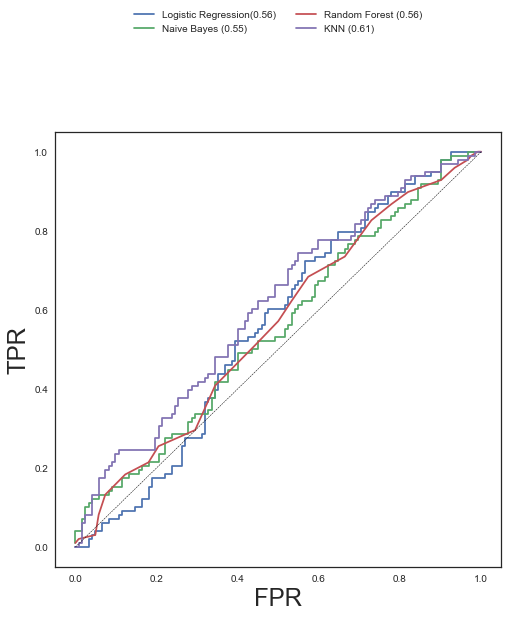

In [53]:
showROC(X_bal_1,Y_bal_1)

# 2st TEST WITH BALANCED DATASET (pers size -> 450 x 2)
### pers taken with repetition, paro -> randomly

## a little better results -> Maybe too much repetition on pers?


In [54]:
Data_paro_2 = Data_paro.sample(n=450, random_state = 950893754, replace = False)
Data_pers_2 = Data_pers.sample(n=450,random_state = 1267483, replace = True)
balanced_2 = pd.concat([Data_pers_2,Data_paro_2])
X_bal_2 = balanced_2[features]
Y_bal_2 = balanced_2[target]
simple_eval_b_2 = model_selection.cross_val_score(simple_logistic, X_bal_2, Y_bal_2, cv=StratifiedKFold(n_splits=10,random_state=1234,shuffle=True))
nb_eval_b_2 = model_selection.cross_val_score(nb, X_bal_2, Y_bal_2, cv=StratifiedKFold(n_splits=10,random_state=871263,shuffle=True))
knn_eval_b_2 = model_selection.cross_val_score(knn, X_bal_2, Y_bal_2, cv=StratifiedKFold(n_splits=10,random_state=19872,shuffle=True))
rf_eval_b_2 = model_selection.cross_val_score(rf, X_bal_2, Y_bal_2, cv=StratifiedKFold(n_splits=10,random_state=900234,shuffle=True))
print("Simple Logistic Regression\t%.1f%%\t%.1f%%" % (100.0*np.average(simple_eval_b_2), 100.0*np.std(simple_eval_b_2)))
print("Naive Bayes\t%.1f%%\t%.1f%%" % (100.0*np.average(nb_eval_b_2), 100.0*np.std(nb_eval_b_2)))
print("k Nearest Neighbor\t%.1f%%\t%.1f%%" % (100.0*np.average(knn_eval_b_2), 100.0*np.std(knn_eval_b_2)))
print("Random Forest\t%.1f%%\t%.1f%%" % (100.0*np.average(rf_eval_b_2), 100.0*np.std(rf_eval_b_2)))


Simple Logistic Regression	59.8%	4.8%
Naive Bayes	56.3%	6.5%
k Nearest Neighbor	71.7%	4.2%
Random Forest	78.6%	4.0%


### 1) Random state : par -> 1234, per -> 2345
##### Simple Logistic Regression	58.7%	5.0%
##### Naive Bayes	54.2%	3.7%
##### k Nearest Neighbor	72.9%	3.6%
##### Random Forest	79.9%	4.5%

### 2) Random state : par -> 3324, per -> 9182749
##### Simple Logistic Regression	57.0%	2.5%
##### Naive Bayes	54.4%	2.9%
##### k Nearest Neighbor	71.1%	3.7%
##### Random Forest	80.6%	3.2%

### 3) Random state : par -> 950893754, per -> 1267483
##### Simple Logistic Regression	59.4%	4.8%
##### Naive Bayes	56.3%	6.5%
##### k Nearest Neighbor	71.7%	4.2%
##### Random Forest	78.6%	4.0%

# Receiver Operating Characteristic (ROC) Curves on balanced_2 dataset

Logistic Regression 	58.6%
Naive Bayes        	53.5%
Random Forest   	71.4%
KNN               	69.0%


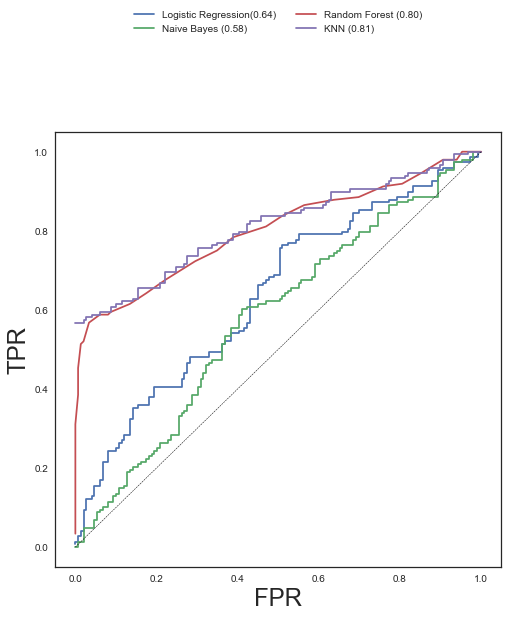

In [55]:
showROC(X_bal_2,Y_bal_2)

# Confusion Matrix balanced_1
### need to fix -> prediction on the training data !!

In [56]:
simple_logistic_cm = LogisticRegression(C=10e10);
simple_logistic_cm.fit(X_bal_1,Y_bal_1);
Y_P_bal_1 = simple_logistic_cm.predict(X_bal_1); # WRONG

In [57]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=0):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])

print("Confusion Matrix - Simple Logistic")
PrintConfusionMatrix(simple_logistic_cm, Y_bal_1, Y_P_bal_1)

Confusion Matrix - Simple Logistic
	0	1
0	 221 	 111
1	 115 	 217


In [58]:
print("Precision %3.2f" % precision_score(Y_bal_1,Y_P_bal_1))
print("Recall    %3.2f" % recall_score(Y_bal_1,Y_P_bal_1))


Precision 0.66
Recall    0.65


In [59]:
rf_cm = RandomForestClassifier(n_estimators=40, max_depth=None, min_samples_split=2, random_state=0)
rf_cm.fit(X_bal_1,Y_bal_1);
Y_P_bal_rf_1 = rf_cm.predict(X_bal_1);# WRONG

knn_cm = neighbors.KNeighborsClassifier(20, weights='distance')
knn_cm.fit(X_bal_1,Y_bal_1);
Y_P_bal_knn_1 = knn_cm.predict(X_bal_1);# WRONG

nb_cm = naive_bayes.GaussianNB();
nb_cm.fit(X_bal_1,Y_bal_1);
Y_P_bal_nb_1 = nb_cm.predict(X_bal_1);# WRONG


print ("0,0 -> is the true parox| 1,1 -> is the true pers \n")

print("Confusion Matrix - Simple Logistic")
PrintConfusionMatrix(simple_logistic_cm, Y_bal_1, Y_P_bal_1)
print("Confusion Matrix - Random Forest")
PrintConfusionMatrix(rf_cm, Y_bal_1, Y_P_bal_rf_1)
print("Confusion Matrix - Knn")
PrintConfusionMatrix(knn_cm, Y_bal_1, Y_P_bal_knn_1)
print("Confusion Matrix - Naive bayes")
PrintConfusionMatrix(nb_cm, Y_bal_1, Y_P_bal_nb_1)

0,0 -> is the true parox| 1,1 -> is the true pers 

Confusion Matrix - Simple Logistic
	0	1
0	 221 	 111
1	 115 	 217
Confusion Matrix - Random Forest
	0	1
0	 332 	 0
1	 0 	 332
Confusion Matrix - Knn
	0	1
0	 332 	 0
1	 0 	 332
Confusion Matrix - Naive bayes
	0	1
0	 237 	 95
1	 187 	 145


In [60]:
Y_bal_1_array = Y_bal_1.as_matrix()
countPerTrue = 0
countParTrue = 0
for i in range(664):
    if (Y_bal_1_array[i] == Y_P_bal_1[i]) and (Y_bal_1_array[i]== 1):
        countPerTrue += 1
    if (Y_bal_1_array[i] == Y_P_bal_1[i]) and (Y_bal_1_array[i]== 0):
        countParTrue += 1
    #print (Y_bal_1_array[i],Y_P_bal_1[i])
print ("FOR logistic regression")
print ("result true pers : ", countPerTrue)
print ("result true paro : ", countParTrue)

FOR logistic regression
result true pers :  217
result true paro :  221


# TO-DO check for statistical differences among models -> Paired T-Test 


#### ...

# STACKING TRY -> blanced 1 -> 664 samples

## xgboost  ACCURACY 0.49 :(  
### maybe too few data?

### from https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

In [61]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X_bal_1, Y_bal_1, test_size=0.33, random_state=1242)
train_data_stacking = pd.concat([train_x,train_y], axis = 1)

test_data_stacking = pd.concat([test_x,test_y], axis = 1)
test_data_stacking.head()
train_y = train_y.ravel()
train_x = train_x.reset_index(drop=True)
test_y = test_y.ravel()
test_x = test_x.reset_index(drop=True)
train_test = pd.concat((train_data_stacking, test_data_stacking)).reset_index(drop=True)
train_test.head()
train_x = train_x.values
test_x = test_x.values

In [62]:
from sklearn.cross_validation import KFold
# Some useful parameters which will come in handy later on
ntrain = train_data_stacking.shape[0]
ntest = test_x.shape[0] 
SEED = 0 # for reproducibility
NFOLDS = 10 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    

/Users/giovanni/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
# data for training the meta-learner -> Out_Of_Fold Predictions
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        #print (i, (train_index, test_index))
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [64]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':20,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [65]:
# Create 5 objects that represent our 5 models
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
rf_s = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et_s = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada_s = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb_s = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc_s = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [66]:
#test_data_s = pd.concat([test_x,test_y], axis = 1)


In [67]:
#train_x = train_x.values
#test_x = test_data_s.values

print("COUNT DOWN ...")
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et_s, train_x, train_y, test_x) # Extra Trees
print(" 5 ")
rf_oof_train, rf_oof_test = get_oof(rf_s,train_x, train_y, test_x) # Random Forest
print(" 4 ")
ada_oof_train, ada_oof_test = get_oof(ada_s, train_x, train_y, test_x) # AdaBoost 
print(" 3 ")
gb_oof_train, gb_oof_test = get_oof(gb_s,train_x, train_y, test_x) # Gradient Boost
print(" 2 ")
#svc_oof_train, svc_oof_test = get_oof(svc_s,train_x, train_y, test_x) # Support Vector Classifier
print("Training FINALLY is complete")

COUNT DOWN ...
 5 
 4 
 3 
 2 
Training FINALLY is complete


In [68]:
rf_feature = rf_s.feature_importances(train_x,train_y)
et_feature = et_s.feature_importances(train_x,train_y)
ada_feature = ada_s.feature_importances(train_x,train_y)
gb_feature = gb_s.feature_importances(train_x,train_y)
#svc_feature = svc_s.feature_importances(train_x,train_y)

[ 0.01438809  0.01941176  0.01924992  0.02641594  0.00906972  0.02470463
  0.010065    0.0115204   0.02061178  0.00915268  0.01380774  0.01074534
  0.0138948   0.00884139  0.00707947  0.00808575  0.01078187  0.02026101
  0.00957927  0.00998618  0.01318148  0.00938952  0.01200416  0.01262626
  0.00890738  0.01305049  0.01063558  0.01028317  0.0102458   0.00961499
  0.01076919  0.00946135  0.01324967  0.0087948   0.01211608  0.01431936
  0.01500997  0.01300814  0.01325116  0.0185787   0.01283757  0.01539343
  0.01261424  0.01879335  0.00952062  0.01172631  0.02081799  0.02733539
  0.01326097  0.02781487  0.00980469  0.02576869  0.01643662  0.01621509
  0.01620537  0.02260829  0.02486113  0.01425039  0.0171412   0.01257523
  0.0166179   0.01350444  0.01299237  0.01879721  0.02556295  0.01617168
  0.01367159  0.00126179  0.01928868]
[ 0.0131412   0.01412761  0.01425336  0.02576626  0.01806426  0.01694936
  0.01367511  0.01604264  0.0143556   0.0129721   0.00625506  0.0027441
  0.02105237  

In [69]:
rf_feature = [ 0.01438809,  0.01941176,  0.01924992,  0.02641594,  0.00906972,  0.02470463,
  0.010065,    0.0115204,   0.02061178 , 0.00915268,  0.01380774 , 0.01074534,
  0.0138948,   0.00884139,  0.00707947 , 0.00808575 , 0.01078187 , 0.02026101,
  0.00957927,  0.00998618,  0.01318148 , 0.00938952 , 0.01200416 , 0.01262626,
  0.00890738,  0.01305049,  0.01063558 , 0.01028317 , 0.0102458   ,0.00961499,
  0.01076919,  0.00946135,  0.01324967 , 0.0087948  , 0.01211608  ,0.01431936,
  0.01500997 , 0.01300814,  0.01325116  ,0.0185787  , 0.01283757  ,0.01539343,
  0.01261424  ,0.01879335,  0.00952062  ,0.01172631 , 0.02081799  ,0.02733539,
  0.01326097  ,0.02781487,  0.00980469  ,0.02576869 , 0.01643662  ,0.01621509,
  0.01620537  ,0.02260829 , 0.02486113  ,0.01425039 , 0.0171412   ,0.01257523,
  0.0166179  , 0.01350444 , 0.01299237  ,0.01879721 , 0.02556295  ,0.01617168,
  0.01367159 , 0.00126179 , 0.01928868]
rf_feature = pd.DataFrame(rf_feature).values.ravel()

et_feature = [ 0.0131412,   0.01412761,  0.01425336,  0.02576626  ,0.01806426,  0.01694936,
  0.01367511,  0.01604264,  0.0143556 ,  0.0129721 ,  0.00625506 , 0.0027441,
  0.02105237,  0.01163723,  0.01714599 , 0.0057816 ,  0.01784954 , 0.00738921,
  0.01147471,  0.00933751,  0.01299277 , 0.01438493,  0.01689985 , 0.01129712,
  0.02034859,  0.01569729,  0.0134598  , 0.01103035,  0.0115293  , 0.01384384,
  0.02117889,  0.01975462,  0.01667049 , 0.01513033,  0.01199249 , 0.01669173,
  0.01177047,  0.0092273 ,  0.00966713 , 0.02044133,  0.01175926 , 0.01891795,
  0.01158416,  0.02066091,  0.0114315  , 0.00826825,  0.01973481 , 0.03075875,
  0.01020234,  0.0117197 ,  0.00775578 , 0.02195177,  0.01103294 , 0.0092718,
  0.01530528,  0.01403991,  0.01867128 , 0.01118809,  0.01023274 , 0.00803048,
  0.01075479,  0.01545255,  0.01691727 , 0.0189609 ,  0.01826104 , 0.02579913,
  0.01213365,  0.01121711,  0.02396239]
et_feature = pd.DataFrame(et_feature).values.ravel()

ada_feature = [ 0.01,   0.024 , 0.002 , 0.014 , 0.006 , 0.014 , 0.014,  0.012 , 0.016 , 0. ,    0.01,
  0.006,  0.012,  0.    , 0.002 , 0.022,  0.   ,  0.016,  0.018 , 0.006,  0.008,
  0.004,  0.018,  0.018 , 0.016 , 0.022,  0.018 , 0.006,  0.008 , 0.008,  0.01 ,  0.01,
  0.002,  0.012,  0.016 , 0.022 , 0.008,  0.004 , 0.006,  0.012 , 0.006,  0.036,
  0.022,  0.012,  0.024 , 0.016 , 0.012,  0.028 , 0.022,  0.02  , 0.01 ,  0.026,
  0.014,  0.014,  0.016 , 0.028 , 0.048,  0.01  , 0.026 , 0.012 , 0.01 ,  0.028,
  0.01 ,  0.034,  0.026 , 0.022 , 0.008,  0.    , 0.028]
ada_feature = pd.DataFrame(ada_feature).values.ravel()



gb_feature = [ 0.00901038 , 0.01312888,  0.00477734 , 0.01111358 , 0.0070951  , 0.01120257,
  0.00382201,  0.00772653,  0.00652257 , 0.00302267 , 0.00451688 , 0.00678106,
  0.00423959 , 0.00125991,  0.00234145 , 0.00473673 , 0.00365751 , 0.00703675,
  0.0046645  , 0.00424648 , 0.00563089 , 0.00518662 , 0.00406204 , 0.00915001,
  0.00560792 , 0.00801476 , 0.00367859 , 0.00519604 , 0.00252421 , 0.00317458,
  0.00425129 , 0.00570147 , 0.007399   , 0.00455279  ,0.00446414  ,0.01155072,
  0.0074738  , 0.00811344 , 0.00830124  ,0.01315213 , 0.00717628  ,0.0135532,
  0.00570522 , 0.01269183 , 0.00487773  ,0.00650904 , 0.00876103  ,0.02373036,
  0.01135877 , 0.01746094  ,0.00370184 , 0.01782744 , 0.00490085 , 0.01301208,
  0.00991664 , 0.01707169  ,0.0137047  , 0.01385736 , 0.00748479 , 0.00828663,
  0.00512736 , 0.00897199 , 0.00890421 , 0.01762697 , 0.01968614 , 0.01203855,
  0.00536319 , 0.00027302 , 0.01033201]
gb_feature = pd.DataFrame(gb_feature).values
gb_feature = gb_feature.ravel()


In [70]:
feature_dataframe = pd.DataFrame({'features' : X_bal_1.columns.values, "RF": rf_feature, "ET" : et_feature, "ADA" : ada_feature, "GB": gb_feature})

feature_dataframe.head()

,ADA,ET,GB,RF,features
0,0.010,0.013141,0.009010,0.014388,RR
1,0.024,0.014128,0.013129,0.019412,QTm_old
2,0.002,0.014253,0.004777,0.019250,sbjBeatConsidered
3,0.014,0.025766,0.011114,0.026416,numRRaveraged
4,0.006,0.018064,0.007095,0.009070,QR


In [71]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.head()

,ADA,ET,GB,RF,features,mean
0,0.010,0.013141,0.009010,0.014388,RR,0.011635
1,0.024,0.014128,0.013129,0.019412,QTm_old,0.017667
2,0.002,0.014253,0.004777,0.019250,sbjBeatConsidered,0.010070
3,0.014,0.025766,0.011114,0.026416,numRRaveraged,0.019324
4,0.006,0.018064,0.007095,0.009070,QR,0.010057


### Second level prediction from the first-level output

In [72]:
base_predictions_train = pd.DataFrame({'RF' : rf_oof_train.ravel(), 'ET': et_oof_train.ravel(), 'ADA': ada_oof_train.ravel(), 'GB': gb_oof_train.ravel()})
base_predictions_train.head()

,ADA,ET,GB,RF
0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0


In [73]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

data_correlation = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data_correlation, filename='labelled-heatmap')

In [74]:
x_train_stacking = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train), axis=1)
x_test_stacking = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

### Training with XGBoost 
https://xgboost.readthedocs.io/en/latest/

In [75]:
import xgboost as xgb

gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train_stacking, train_y)
predictions_gbm = gbm.predict(x_test_stacking)

In [76]:
test_y.size

220

In [77]:
PrintConfusionMatrix(gbm, test_y, predictions_gbm)



	0	1
0	 41 	 81
1	 31 	 67


In [78]:
countPerTrue = 0
countParTrue = 0
countPerFalse = 0
countParFalse = 0
for i in range(test_y.size):
    if (test_y[i] == predictions_gbm[i]) and (test_y[i]== 1):
        countPerTrue += 1
    if (test_y[i] == predictions_gbm[i]) and (test_y[i]== 0):
        countParTrue += 1
    if (test_y[i] != predictions_gbm[i]) and (test_y[i]== 1):
        countParFalse += 1
    if (test_y[i] != predictions_gbm[i]) and (test_y[i]== 0):
        countPerFalse += 1
    #print (Y_bal_1_array[i],Y_P_bal_1[i])
print ("FOR logistic regression")
print ("result true pers : ", countPerTrue)
print ("result true paro : ", countParTrue)
print ("result false pers : ", countPerFalse)
print ("result false paro : ", countParFalse)
print ("ACCURACY : ", (countPerTrue + countParTrue)/test_y.size)
print ("PRECISION : ", countPerTrue/ (countPerTrue+countPerFalse))
print ("RECALL : ", countPerTrue/ (countPerTrue+countParFalse))

FOR logistic regression
result true pers :  67
result true paro :  41
result false pers :  81
result false paro :  31
ACCURACY :  0.4909090909090909
PRECISION :  0.4527027027027027
RECALL :  0.6836734693877551


In [79]:
## Avarage Aggregation ? -> maybe its better to train 5 models -> to avoid ties